## Milestone 1 SIRD part coding 

## Step 1: import the dataset to a pandas dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
import numpy as np
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
import math
import copy
import warnings
import os
import csv
warnings.filterwarnings('ignore')

##Load data
dataUS = pd.read_csv("us.csv")
dataSize = len(dataUS.index)
dataStates = pd.read_csv("us-states.csv")
dataStateSize = len(dataStates.index)
# print(dataUS.loc[0], dataSize, "\n", dataStates.loc[0] ,dataStateSize)
# if (dataUS.loc[1]["date"]>dataUS.loc[0]["date"]):
#     print("nice")

## Step 2. Data cleaning and reorganization
###  Step 2.1: Extract US data (daily new death from total death) and save to a file 

In [4]:
## US data
usDeath = []
for i in range(dataSize):
    if (i - 1) < 0:
        usDeath.append([dataUS.loc[i]["date"],dataUS.loc[i]["deaths"]])
    else:   
        usDeath.append([dataUS.loc[i]["date"],dataUS.loc[i]["deaths"]-dataUS.loc[i-1]["deaths"]])
with open("clean-data/US.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(usDeath)

print (usDeath)

[['2020-01-21', 0], ['2020-01-22', 0], ['2020-01-23', 0], ['2020-01-24', 0], ['2020-01-25', 0], ['2020-01-26', 0], ['2020-01-27', 0], ['2020-01-28', 0], ['2020-01-29', 0], ['2020-01-30', 0], ['2020-01-31', 0], ['2020-02-01', 0], ['2020-02-02', 0], ['2020-02-03', 0], ['2020-02-04', 0], ['2020-02-05', 0], ['2020-02-06', 0], ['2020-02-07', 0], ['2020-02-08', 0], ['2020-02-09', 0], ['2020-02-10', 0], ['2020-02-11', 0], ['2020-02-12', 0], ['2020-02-13', 0], ['2020-02-14', 0], ['2020-02-15', 0], ['2020-02-16', 0], ['2020-02-17', 0], ['2020-02-18', 0], ['2020-02-19', 0], ['2020-02-20', 0], ['2020-02-21', 0], ['2020-02-22', 0], ['2020-02-23', 0], ['2020-02-24', 0], ['2020-02-25', 0], ['2020-02-26', 0], ['2020-02-27', 0], ['2020-02-28', 0], ['2020-02-29', 1], ['2020-03-01', 2], ['2020-03-02', 3], ['2020-03-03', 4], ['2020-03-04', 2], ['2020-03-05', 0], ['2020-03-06', 3], ['2020-03-07', 4], ['2020-03-08', 3], ['2020-03-09', 4], ['2020-03-10', 5], ['2020-03-11', 6], ['2020-03-12', 6], ['2020-03-1

### Step 2.2: Extract states' COVID data and save to files

In [3]:
# State data
statesDate = {}
statesData = {}
for i in range(dataStateSize):
    if (dataStates.loc[i]["state"] in statesDate):
        statesData[dataStates.loc[i]["state"]].append([dataStates.loc[i]["date"],dataStates.loc[i]["deaths"]-statesData[dataStates.loc[i]["state"]][-1][1]])
    else:
        statesDate[dataStates.loc[i]["state"]] = dataStates.loc[i]["date"]
        statesData[dataStates.loc[i]["state"]] = []
        # First COVID case
        statesData[dataStates.loc[i]["state"]].append([dataStates.loc[i]["date"],dataStates.loc[i]["deaths"]])
for key in statesData:
    path = "clean-data/" + key + ".csv"
    print(path, " has been successfully created")
    with open(path, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(statesData[key])
    
## Get latest date of COVID 
#startDate = statesDate[max(statesDate,key=statesDate.get)]
#print(statesData)

clean-data/Washington.csv  has been successfully created
clean-data/Illinois.csv  has been successfully created
clean-data/California.csv  has been successfully created
clean-data/Arizona.csv  has been successfully created
clean-data/Massachusetts.csv  has been successfully created
clean-data/Wisconsin.csv  has been successfully created
clean-data/Texas.csv  has been successfully created
clean-data/Nebraska.csv  has been successfully created
clean-data/Utah.csv  has been successfully created
clean-data/Oregon.csv  has been successfully created
clean-data/Florida.csv  has been successfully created
clean-data/New York.csv  has been successfully created
clean-data/Rhode Island.csv  has been successfully created
clean-data/Georgia.csv  has been successfully created
clean-data/New Hampshire.csv  has been successfully created
clean-data/North Carolina.csv  has been successfully created
clean-data/New Jersey.csv  has been successfully created
clean-data/Colorado.csv  has been successfully cre

## Step 3: EDA 
### Step 3.1: Plot the line chart of US daily new deaths

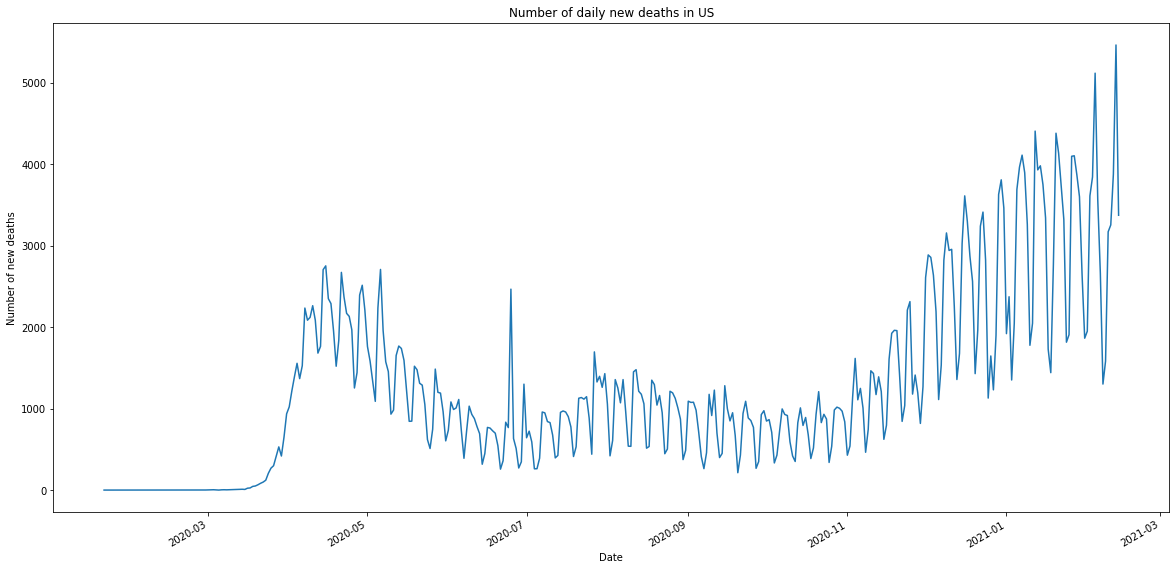

In [4]:
usDeathT = np.array(usDeath).transpose()
numDeath = usDeathT[1].astype(np.int)
#print(usDeathT[1])
fig, ax = plt.subplots(figsize=(20, 10))
converted_dates = dates.datestr2num(usDeathT[0])
ax.plot(converted_dates, numDeath)
ax.xaxis_date()
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Number of new deaths")
plt.title("Number of daily new deaths in US")
plt.show()

### Step 3.2: Plot the line charts of states' daily new deaths


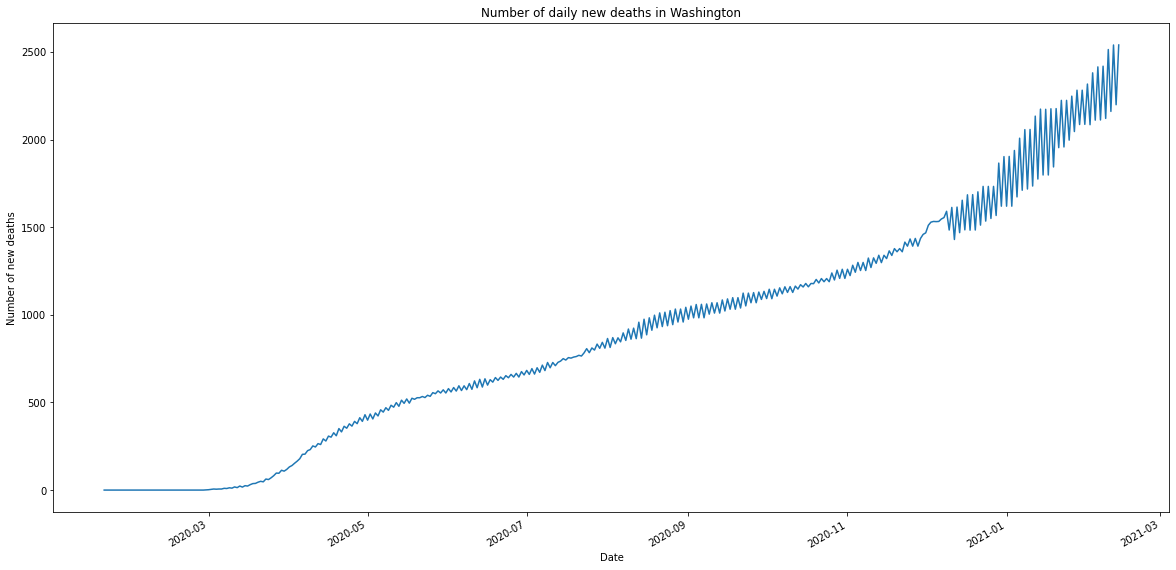

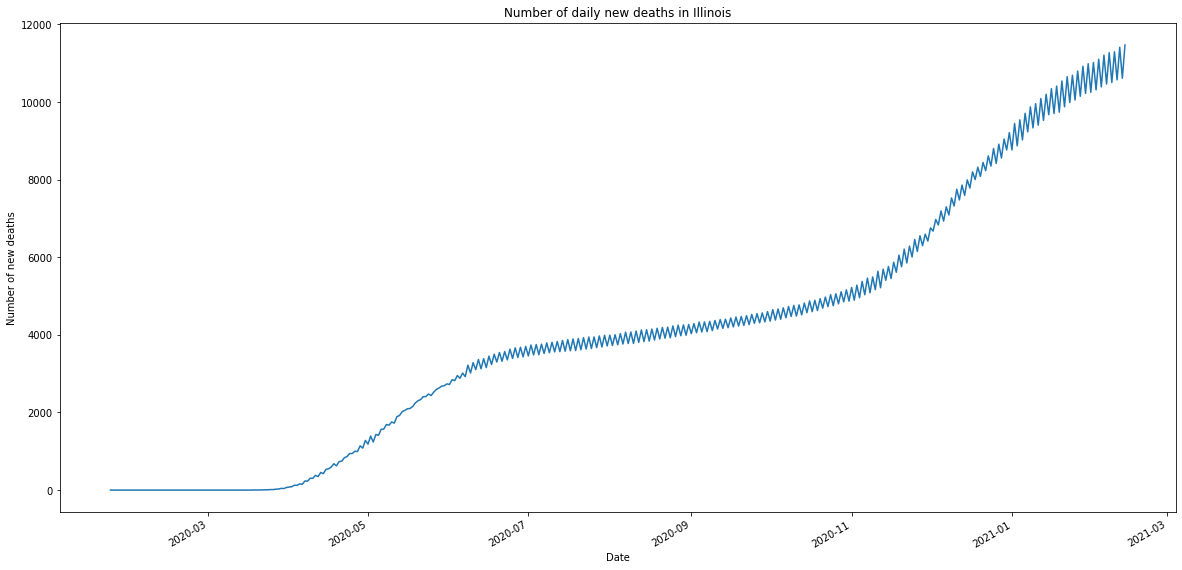

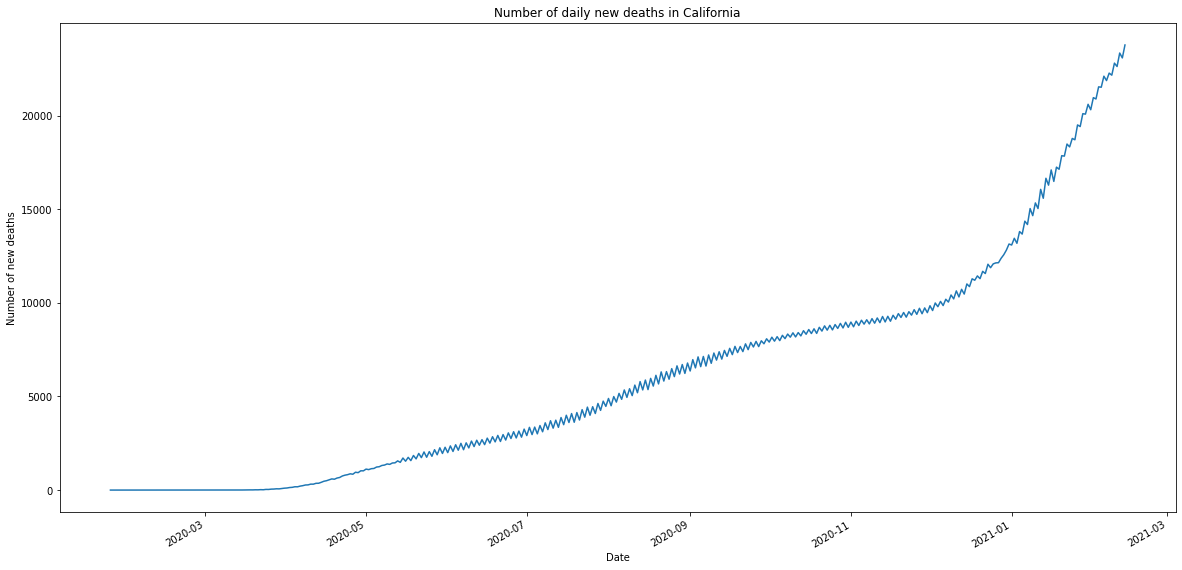

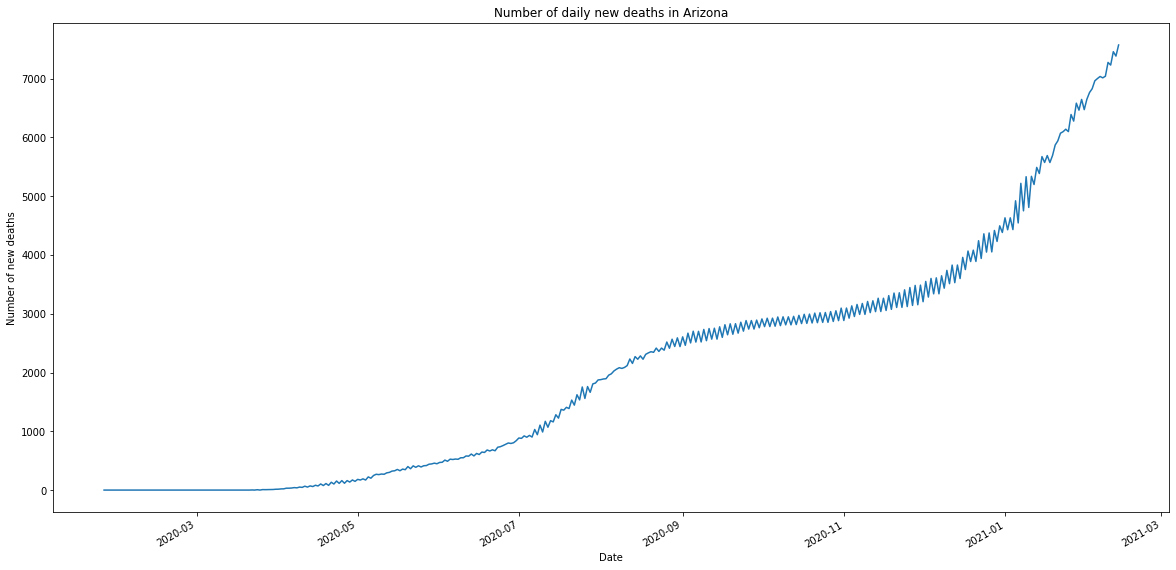

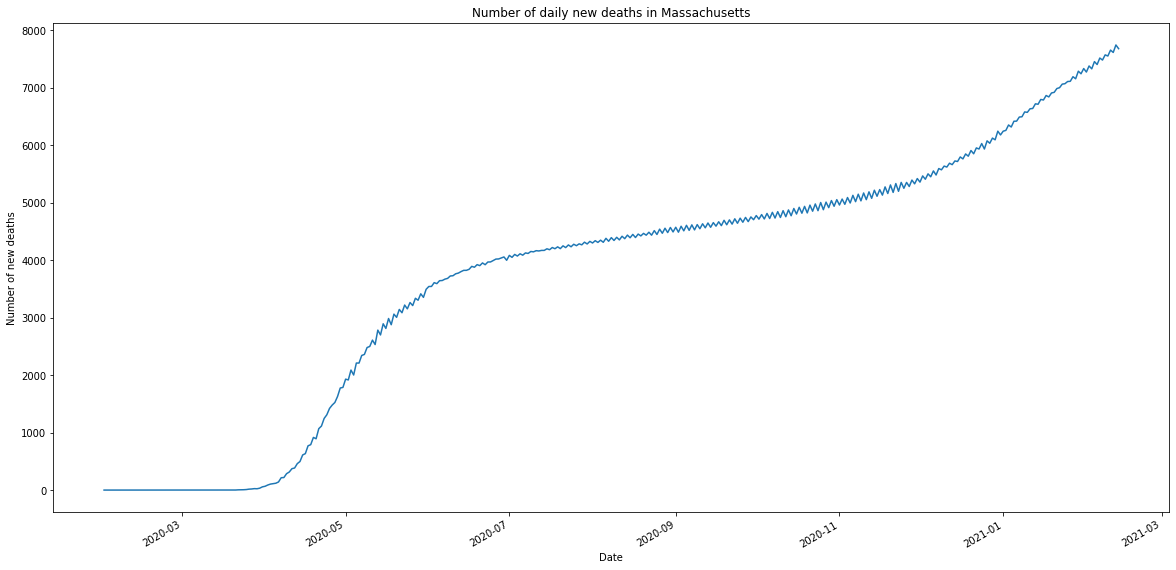

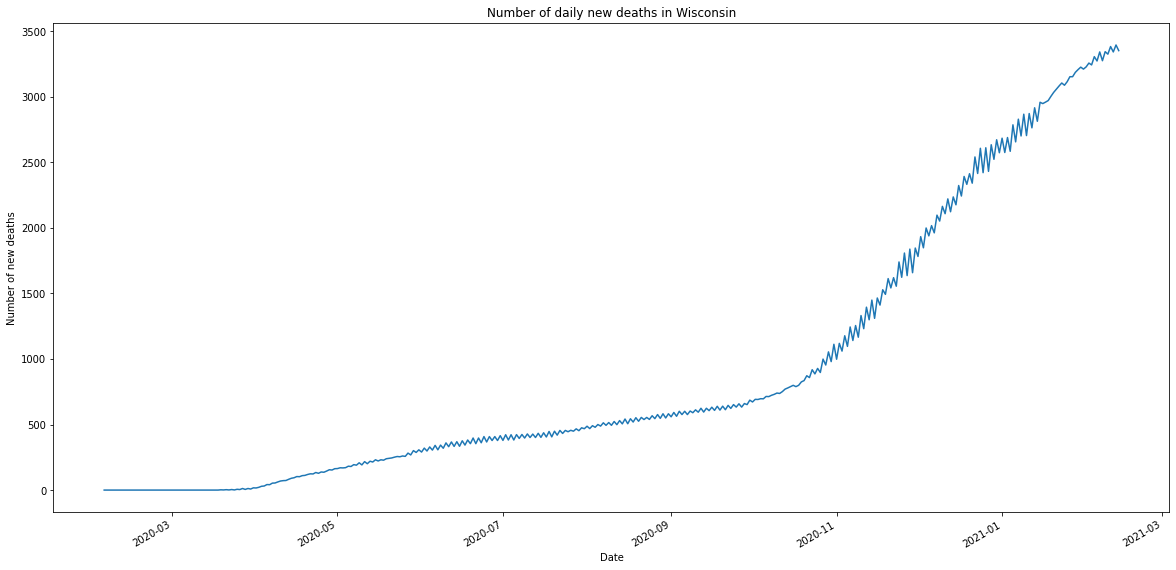

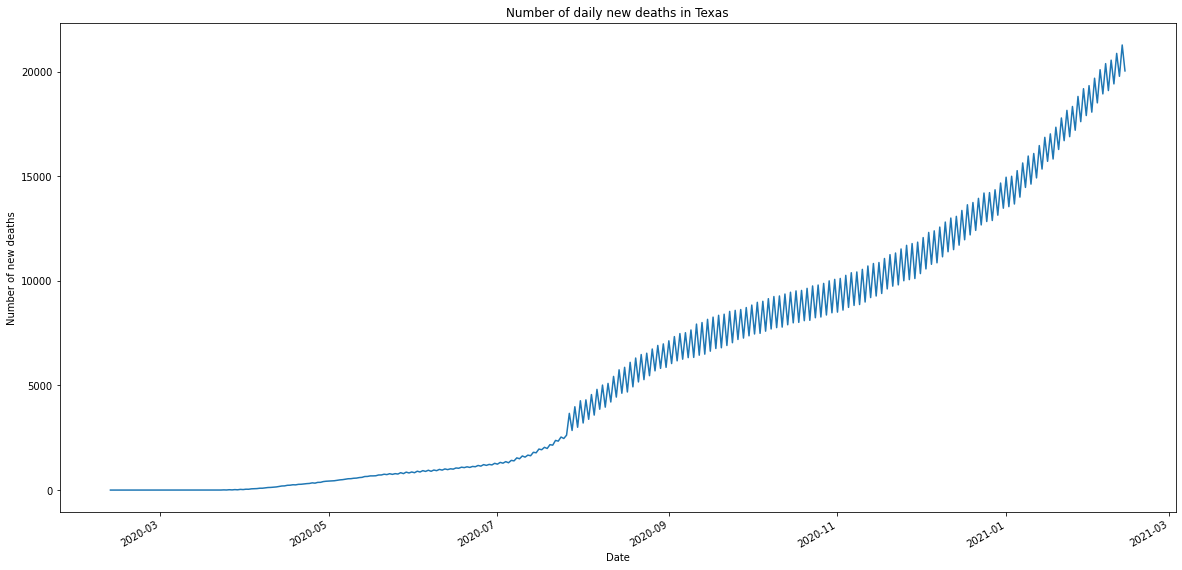

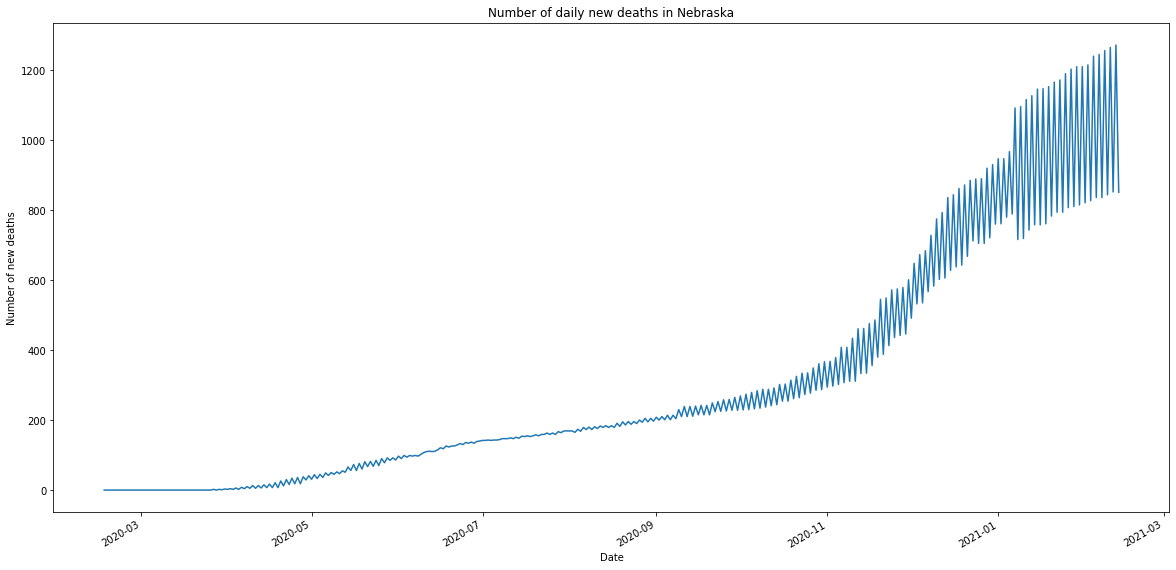

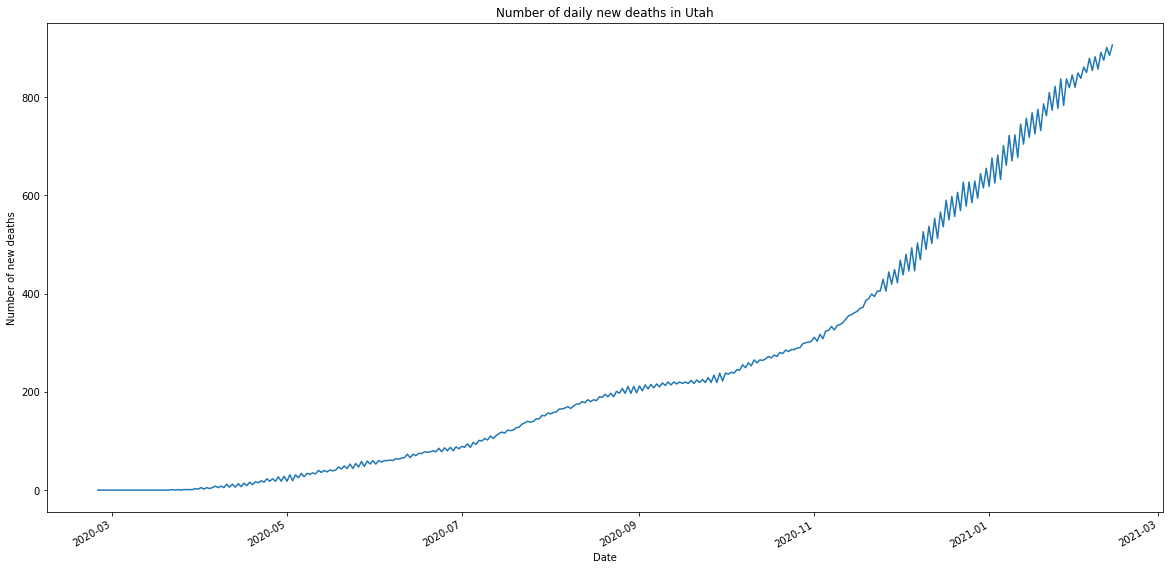

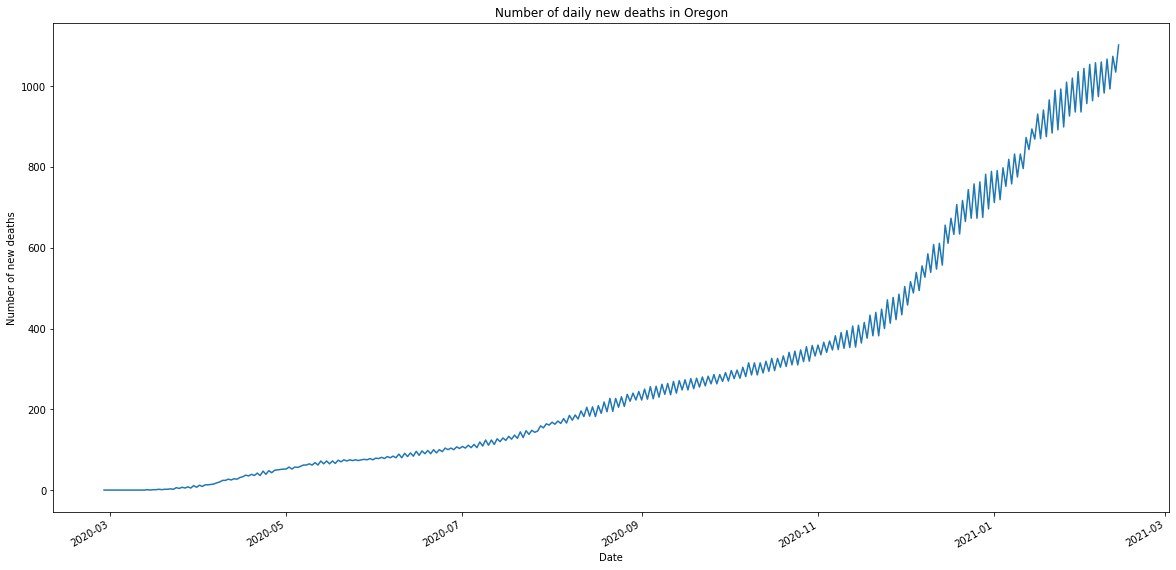

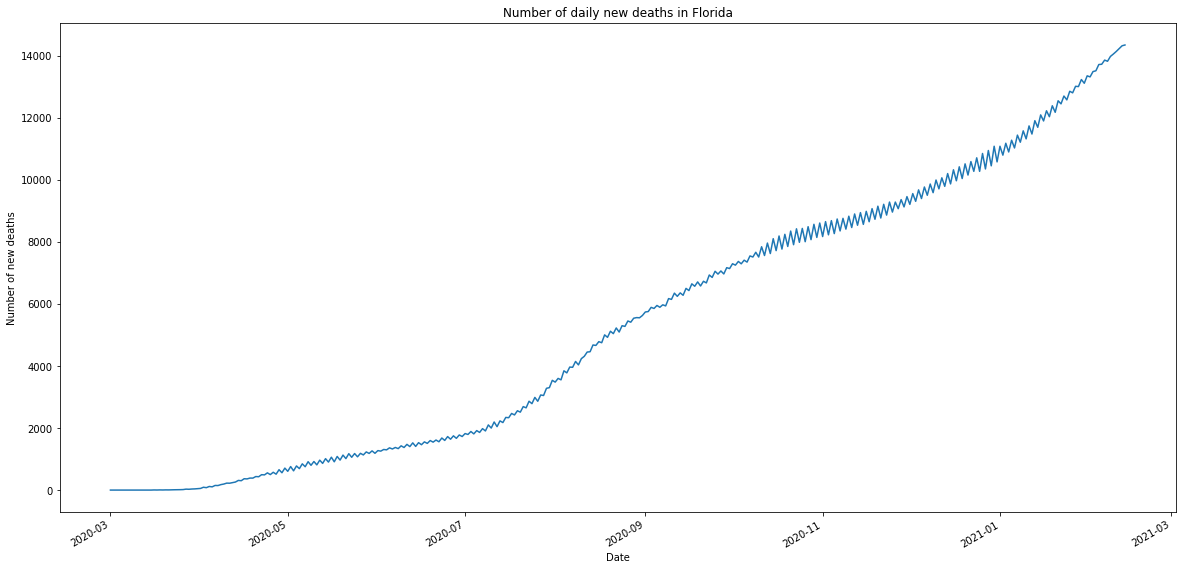

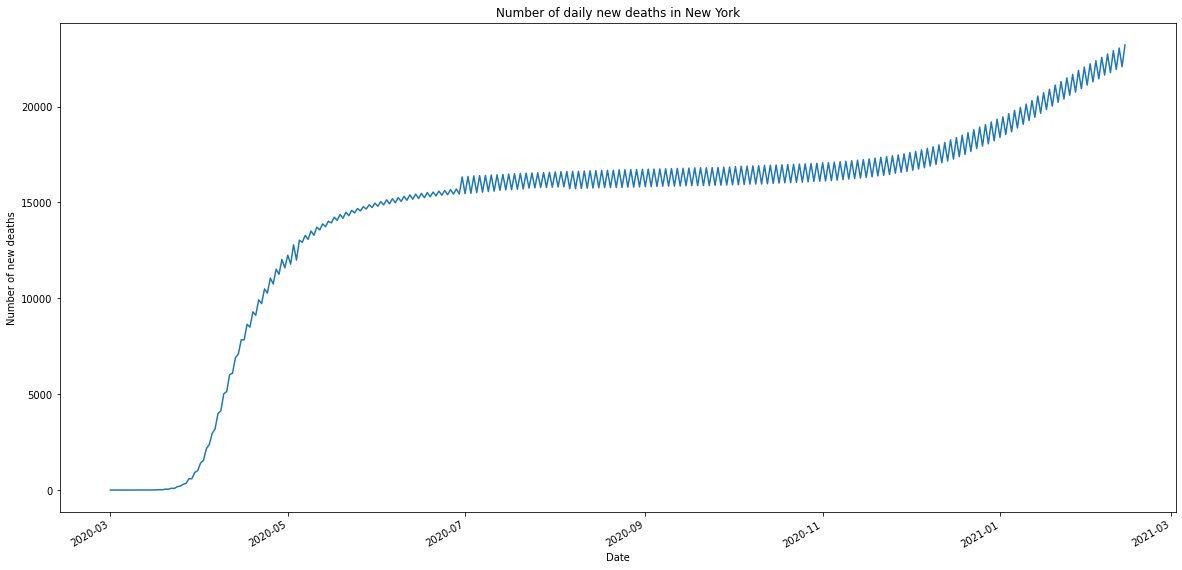

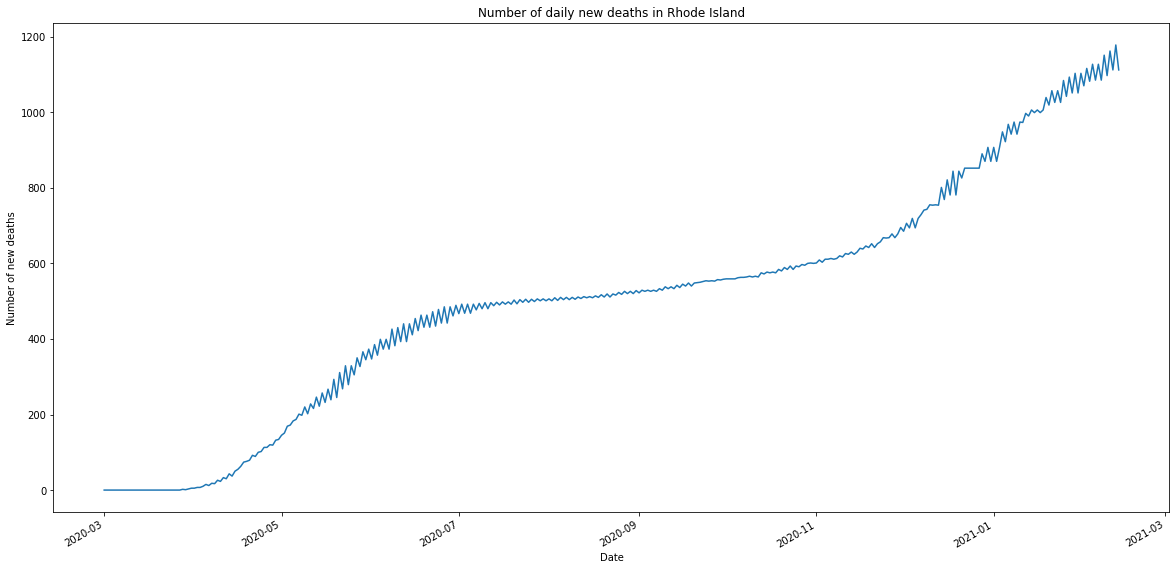

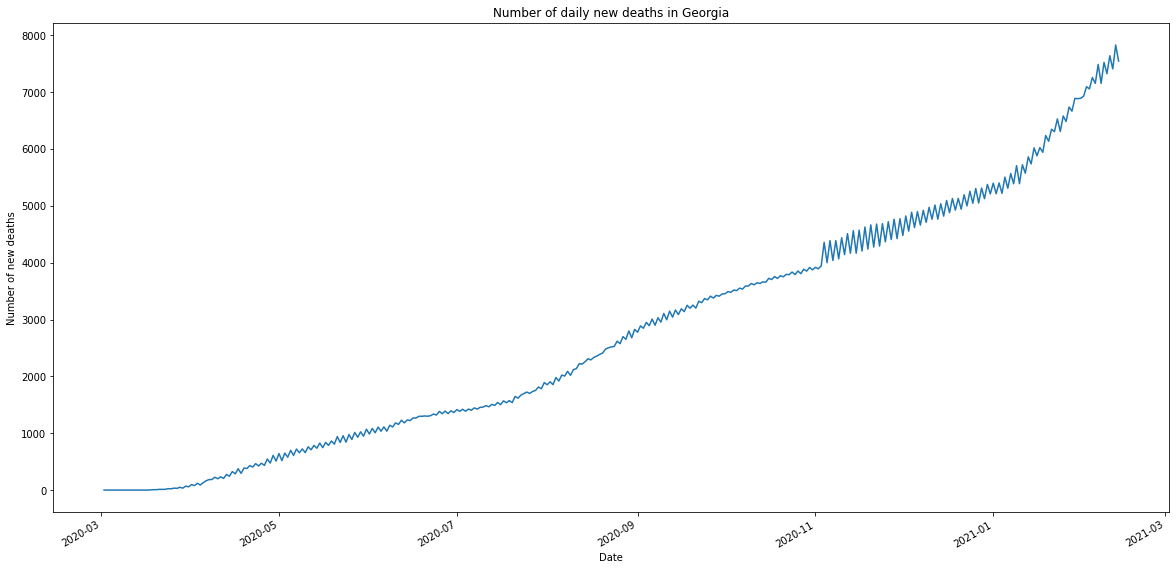

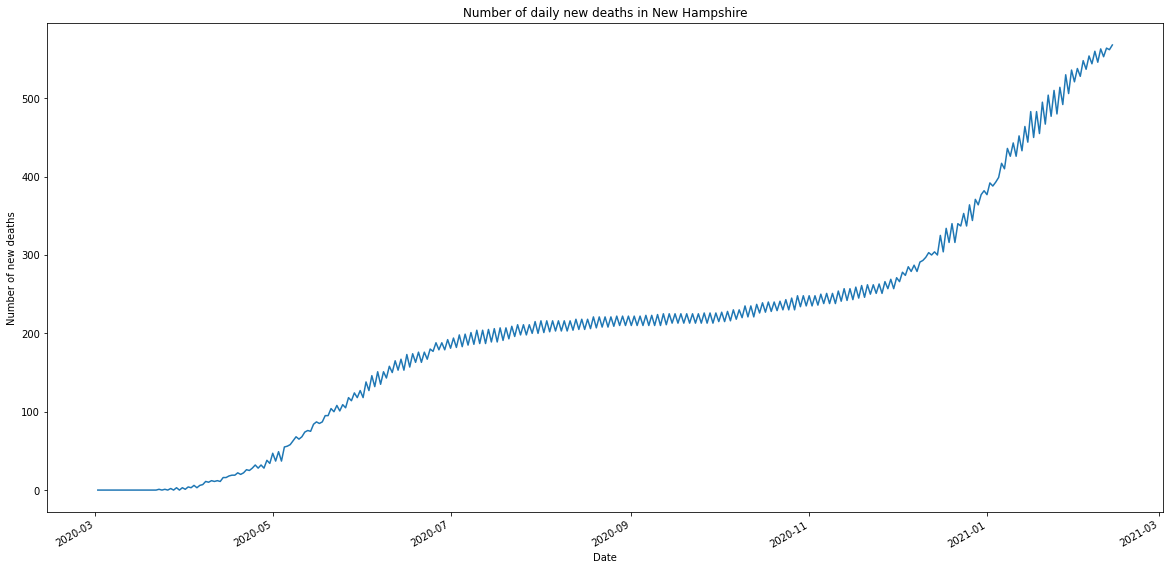

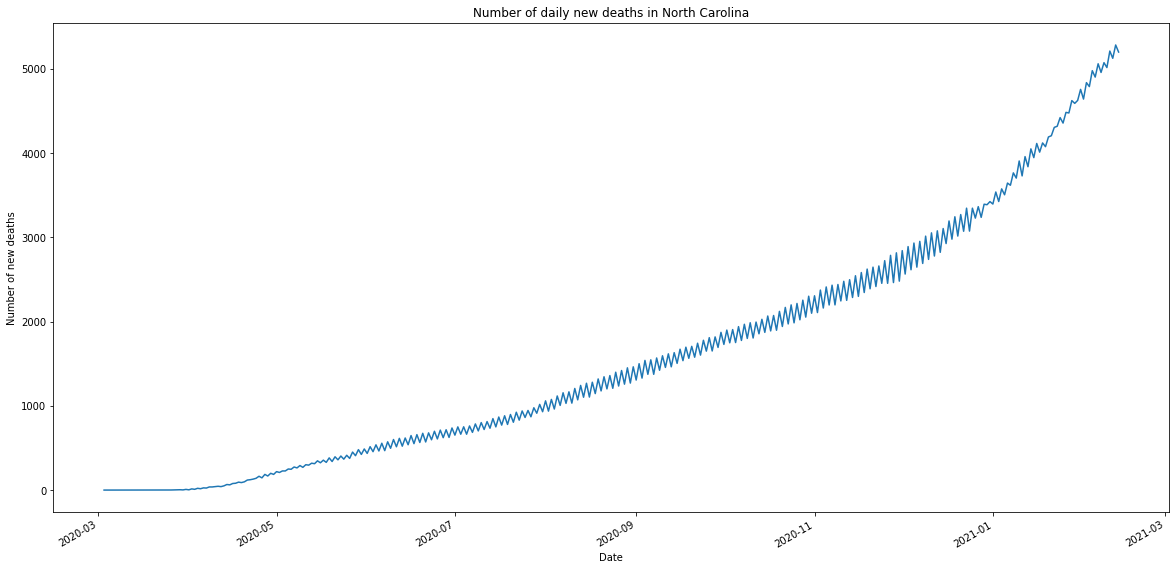

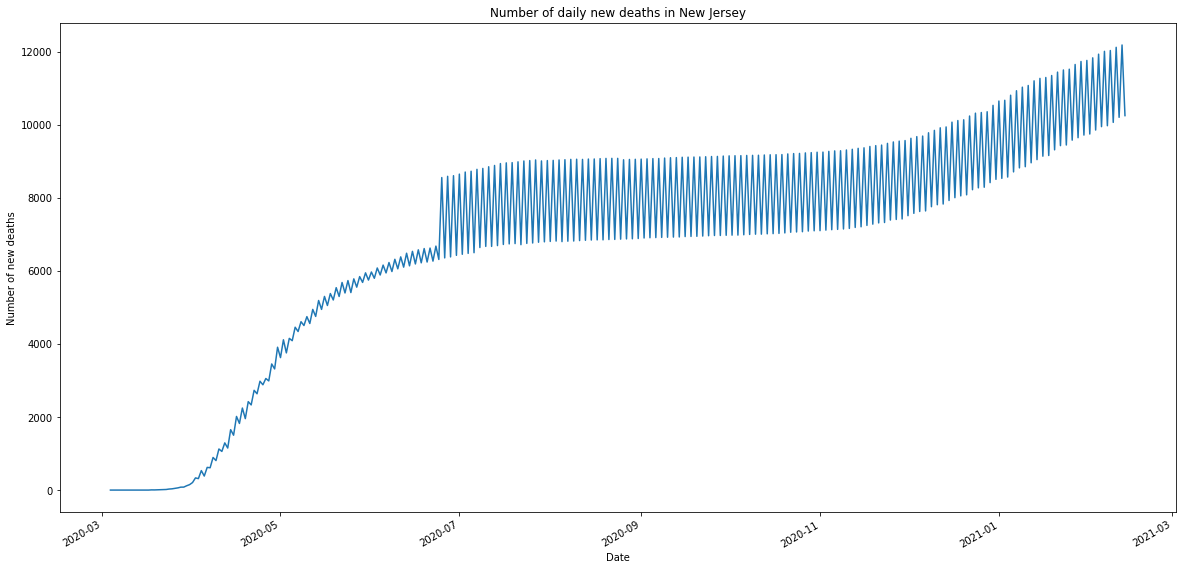

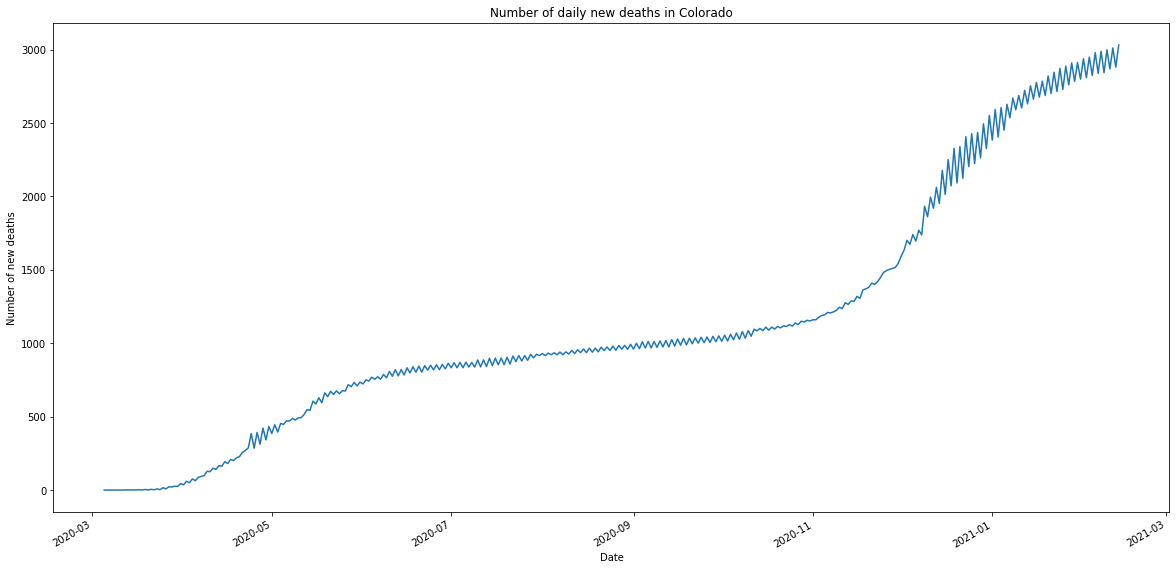

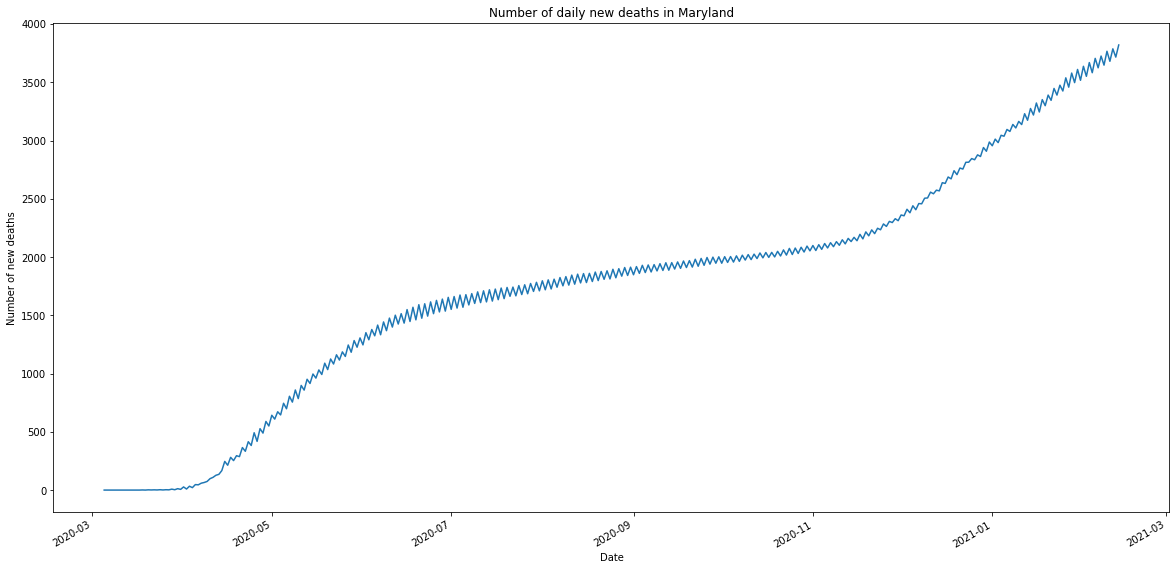

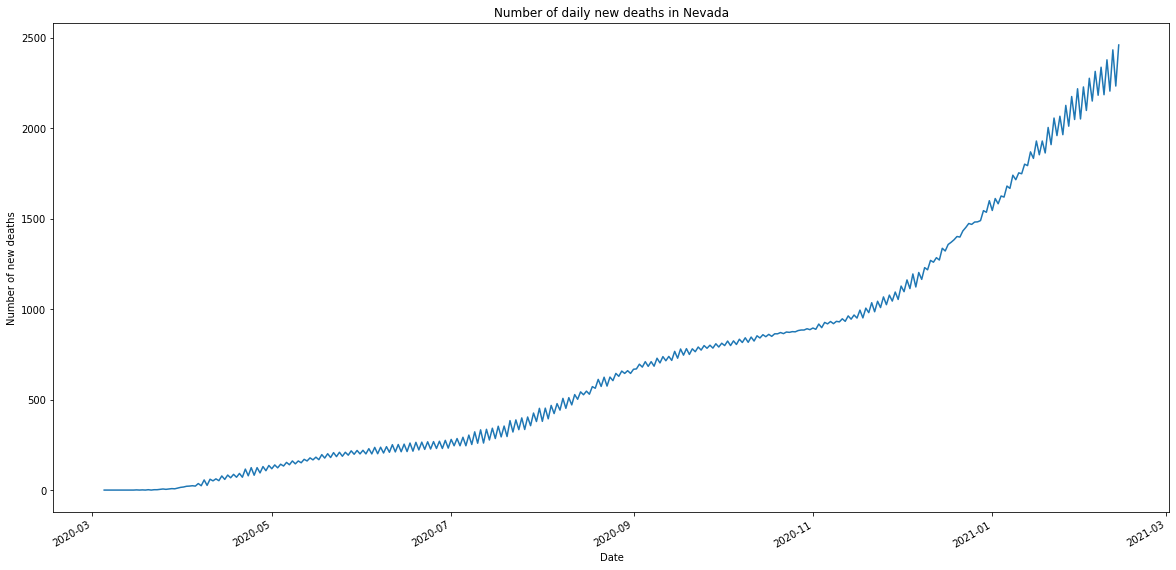

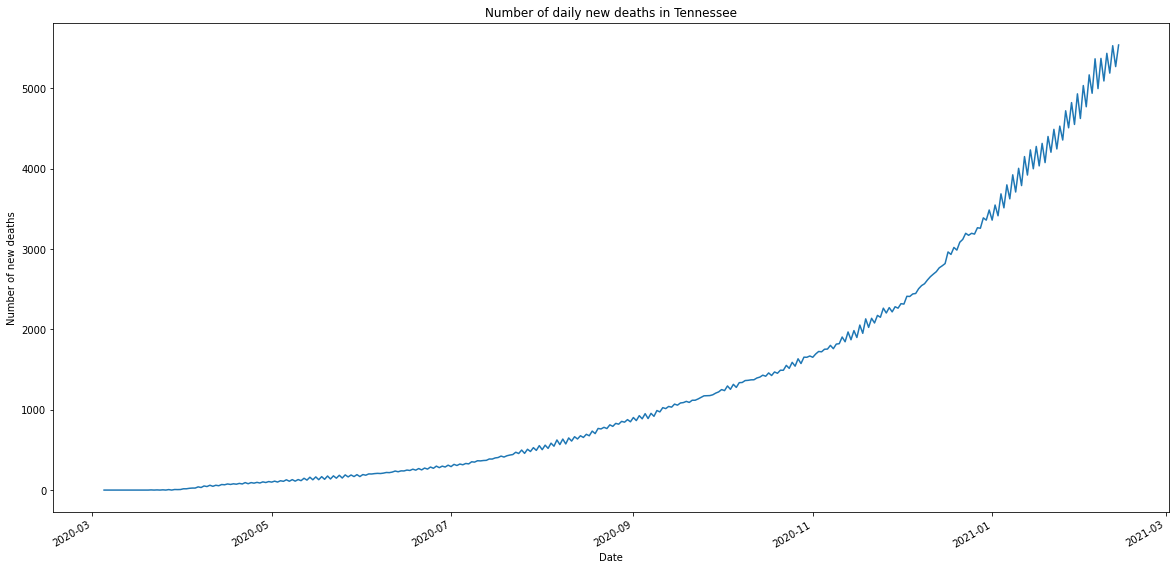

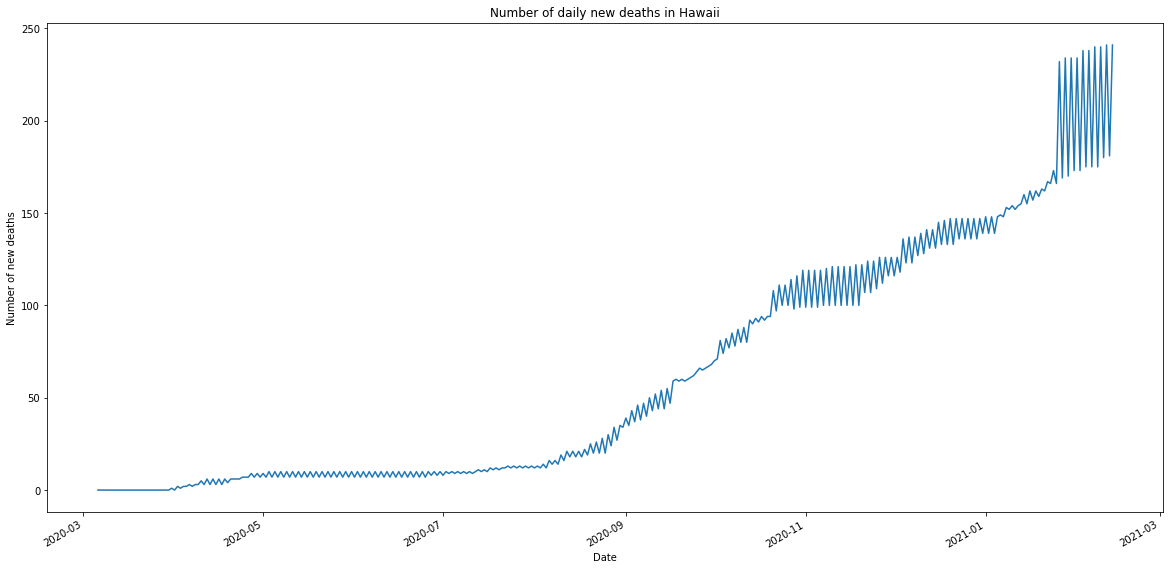

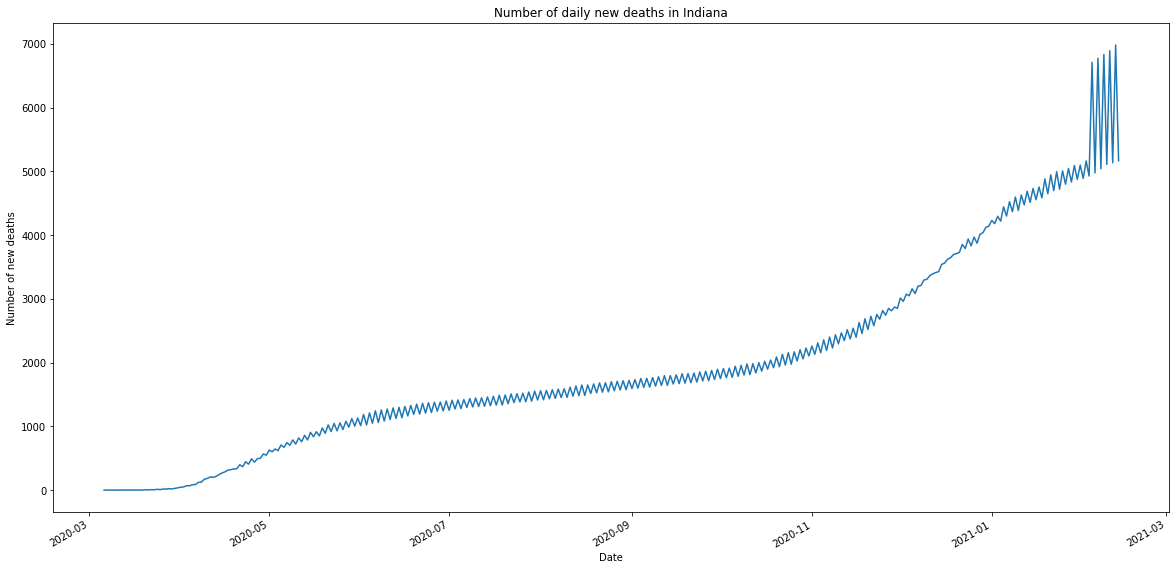

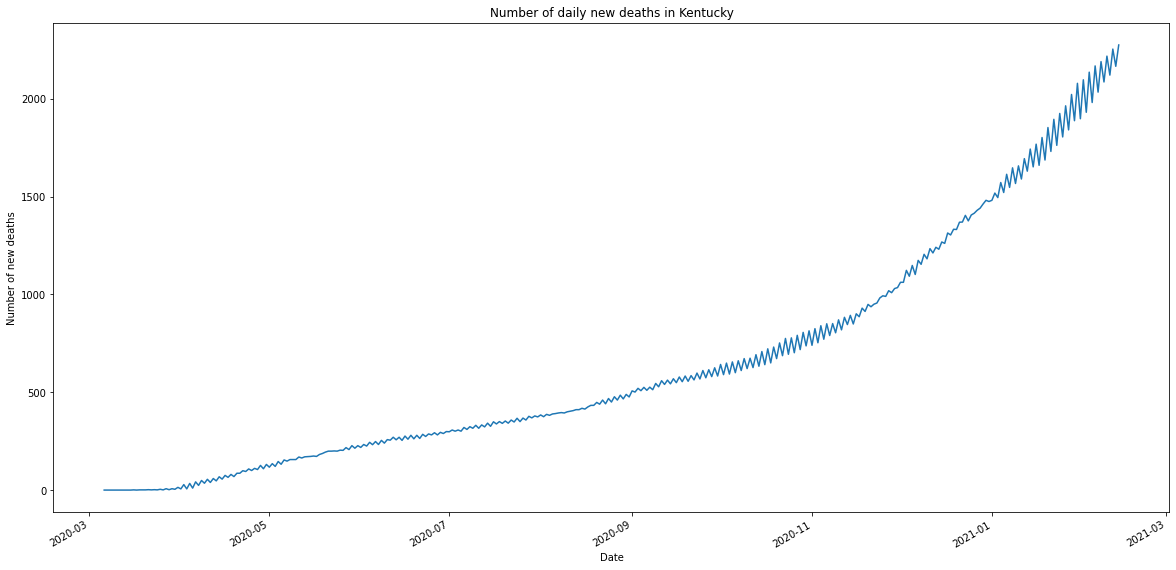

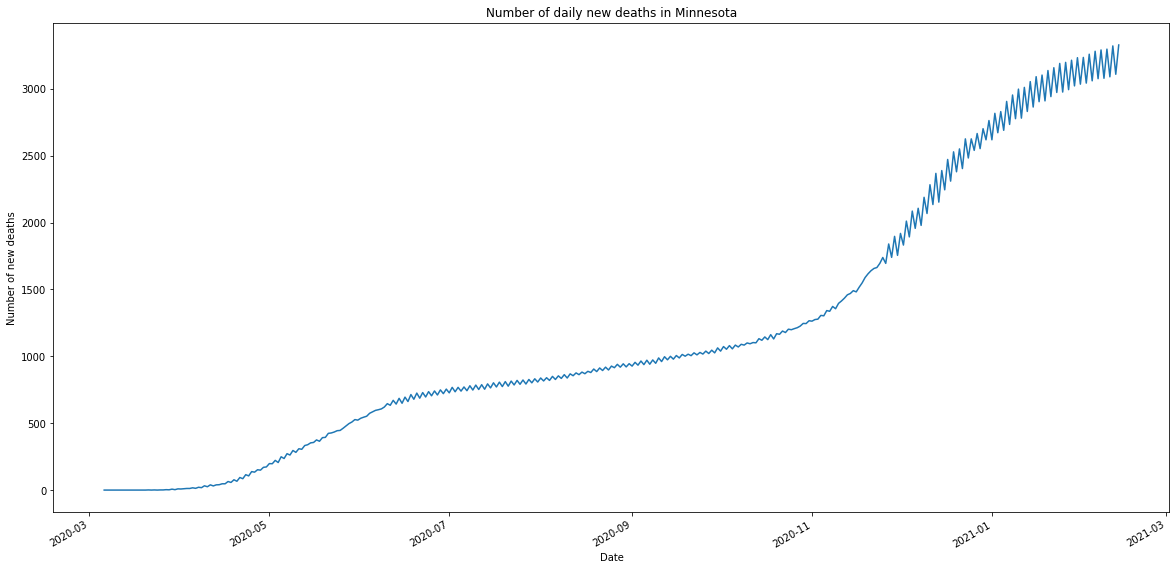

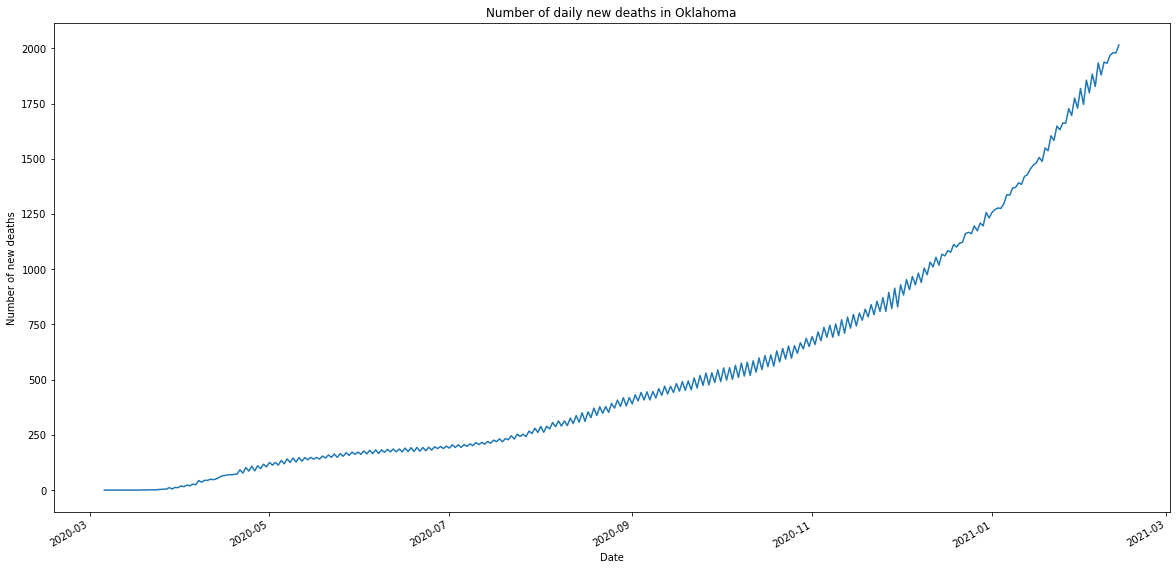

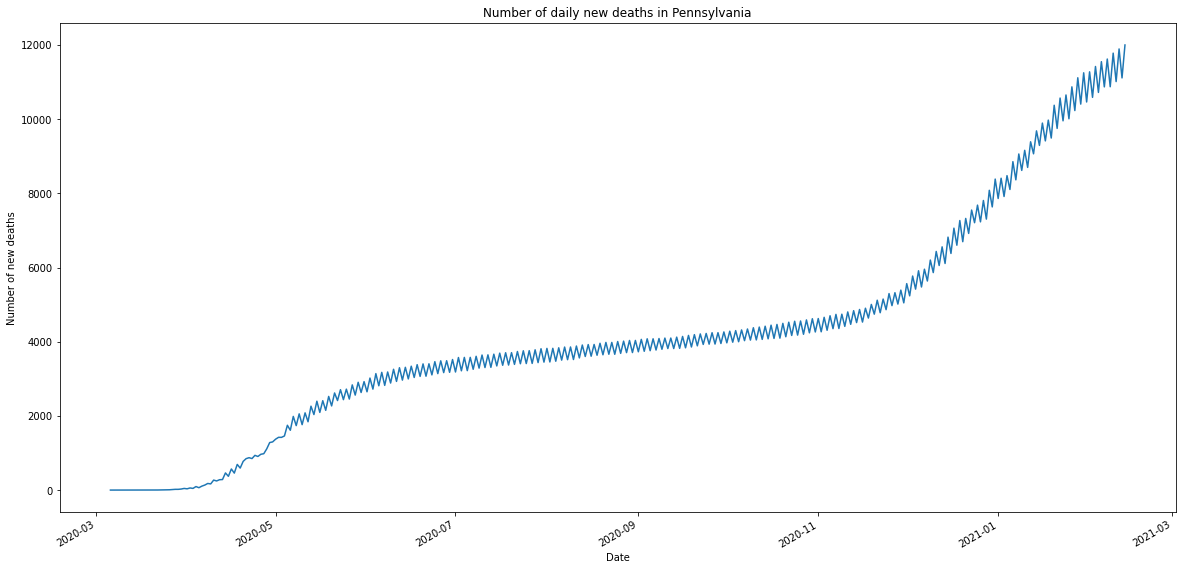

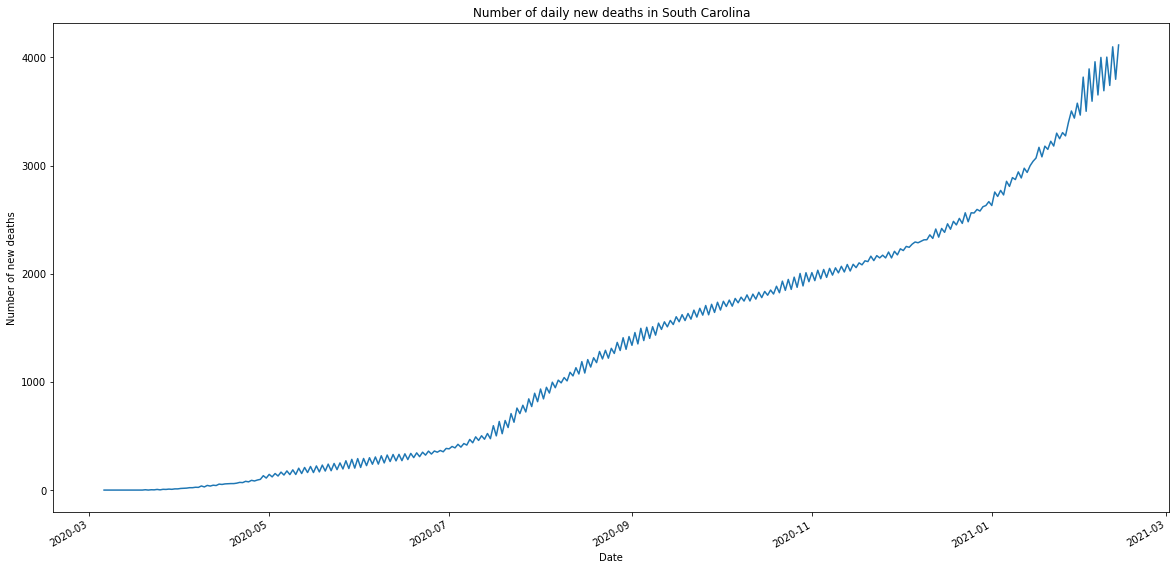

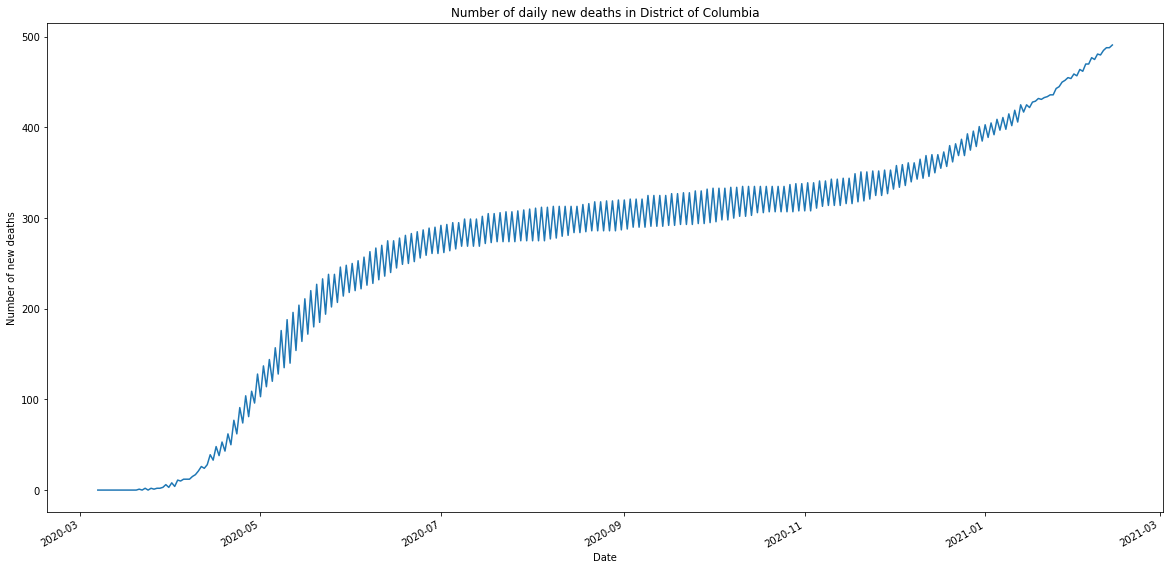

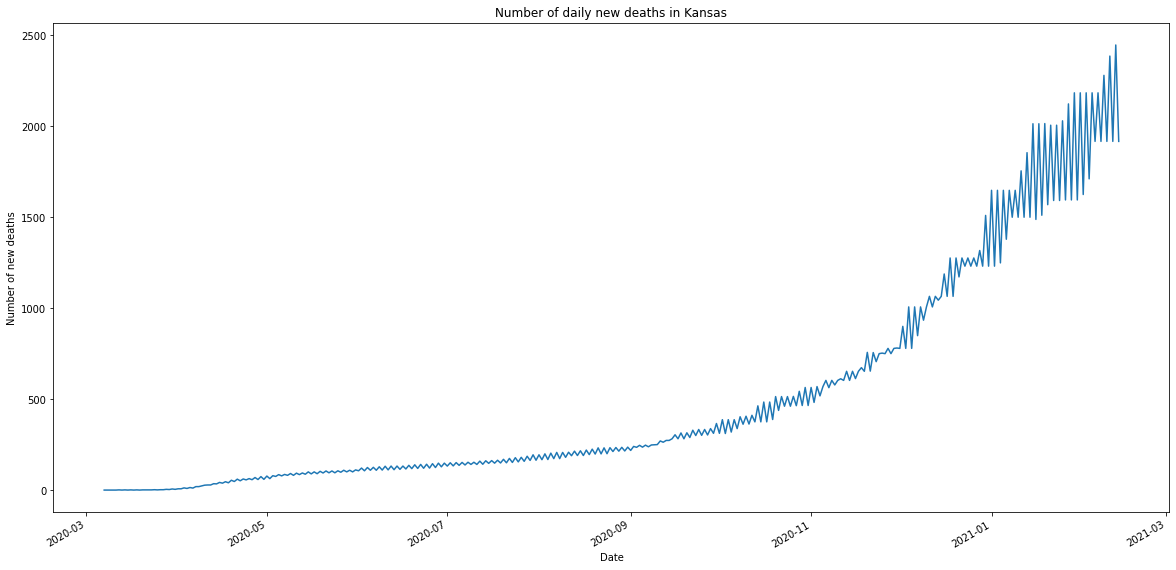

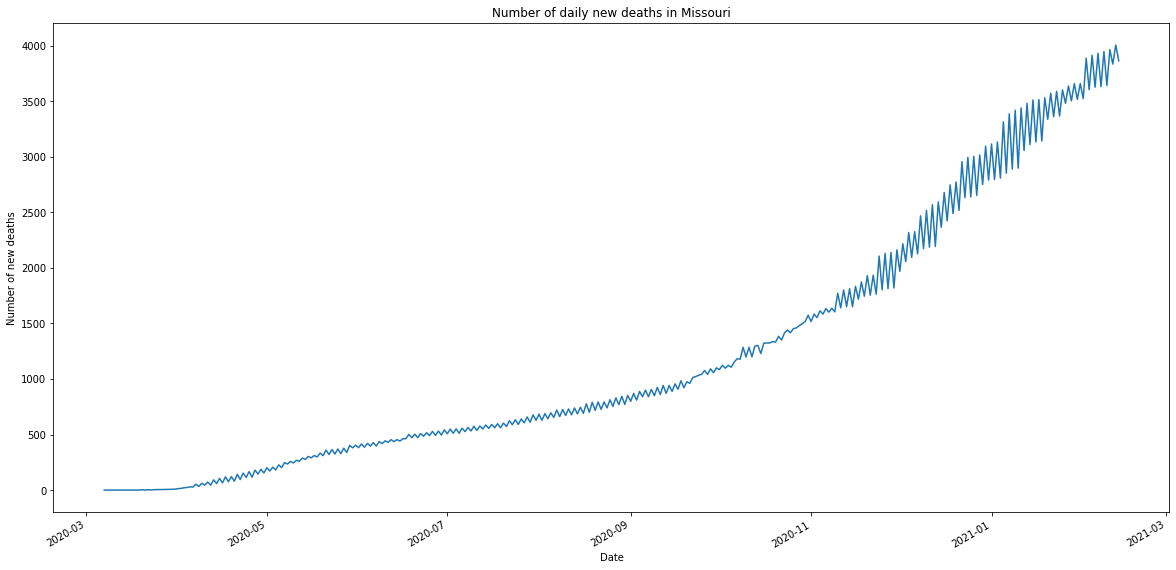

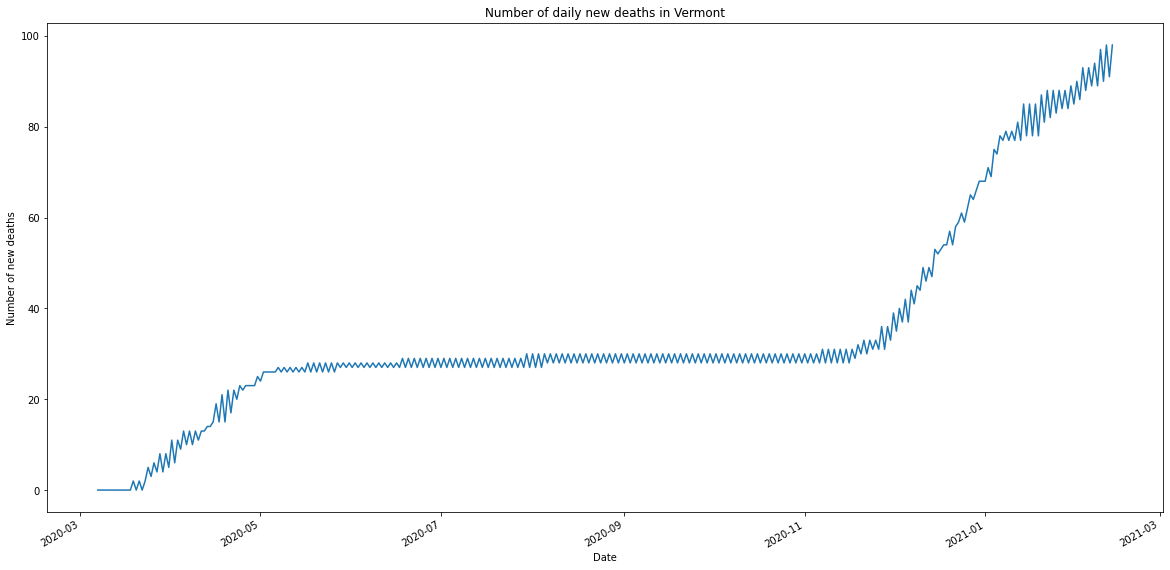

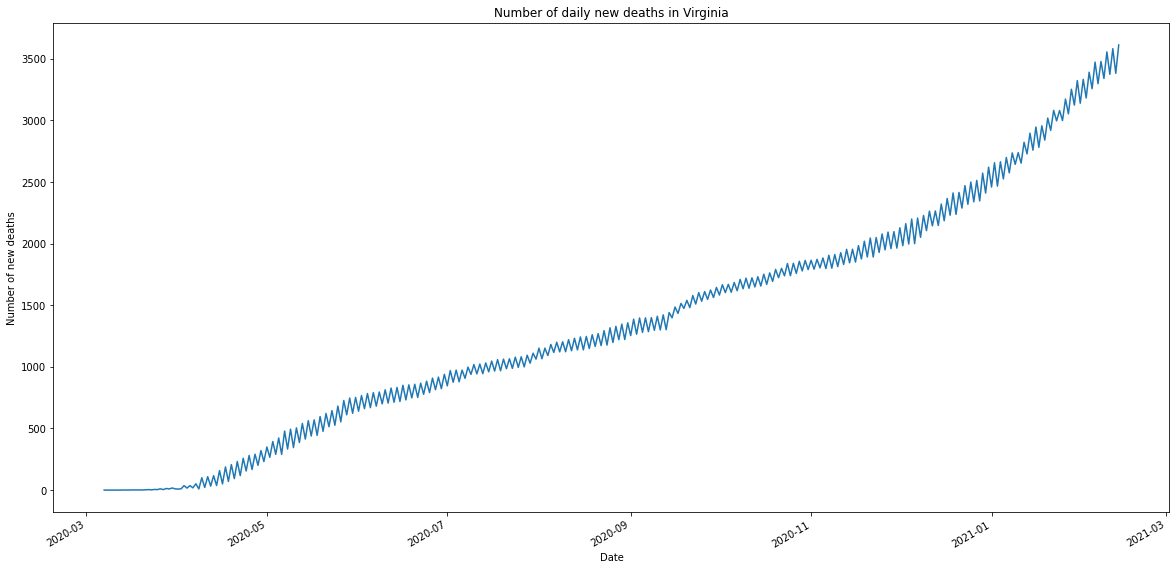

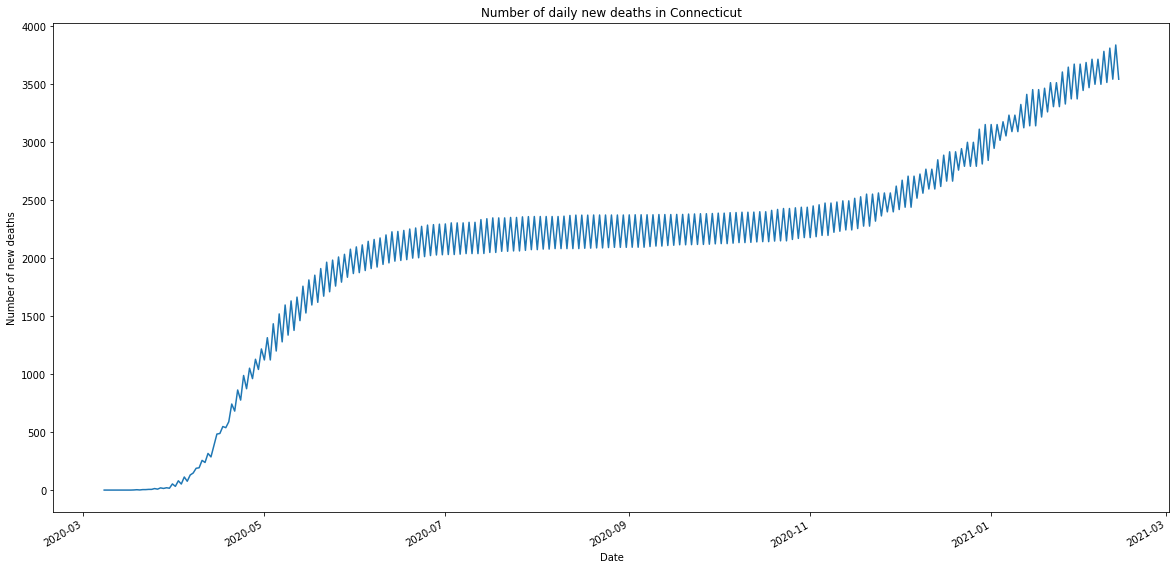

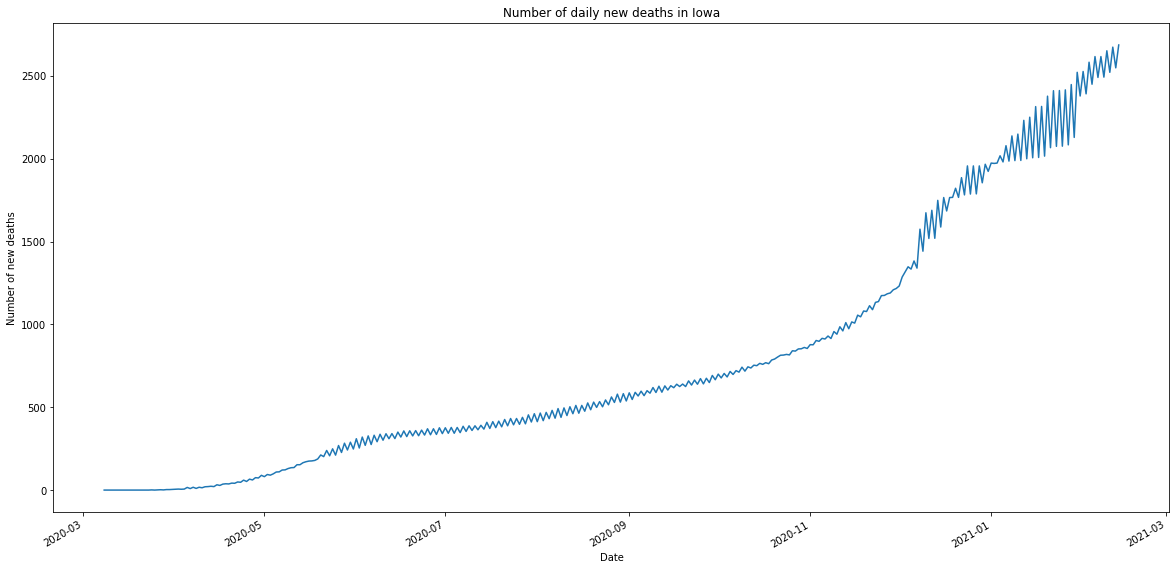

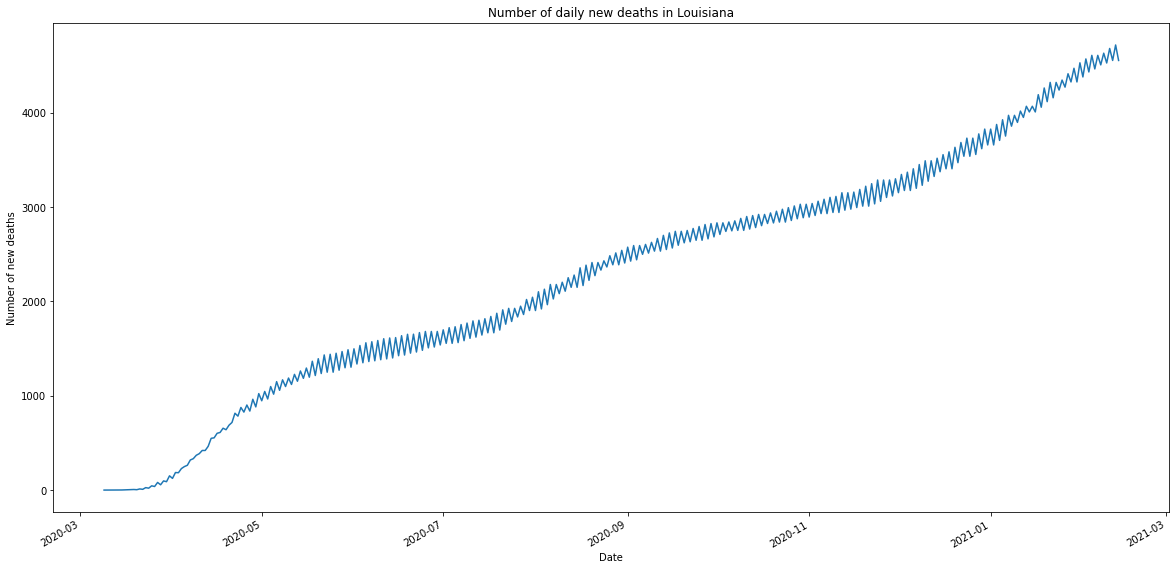

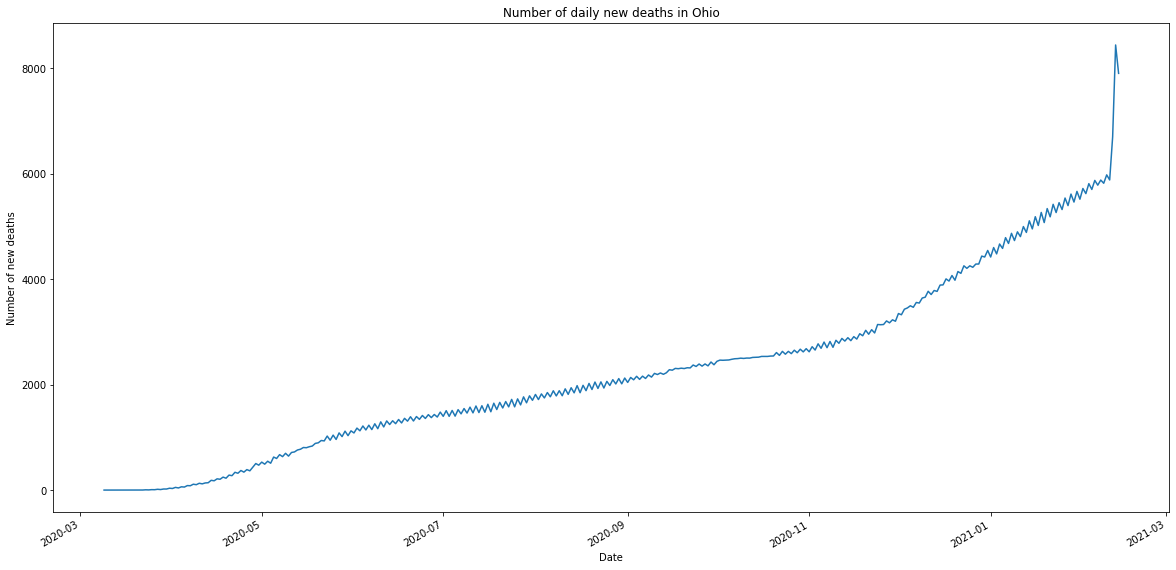

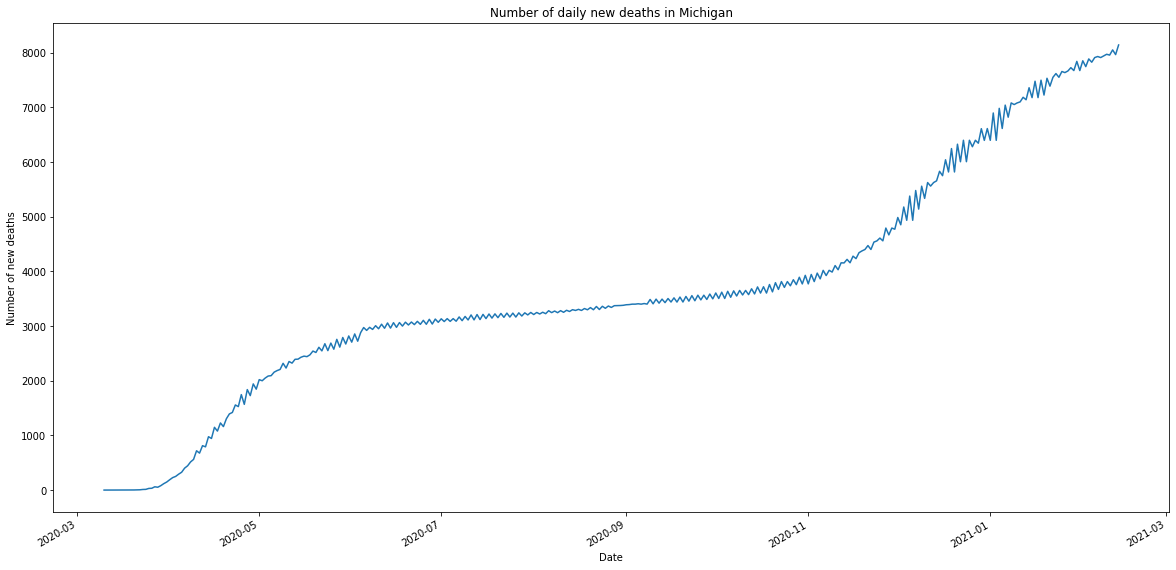

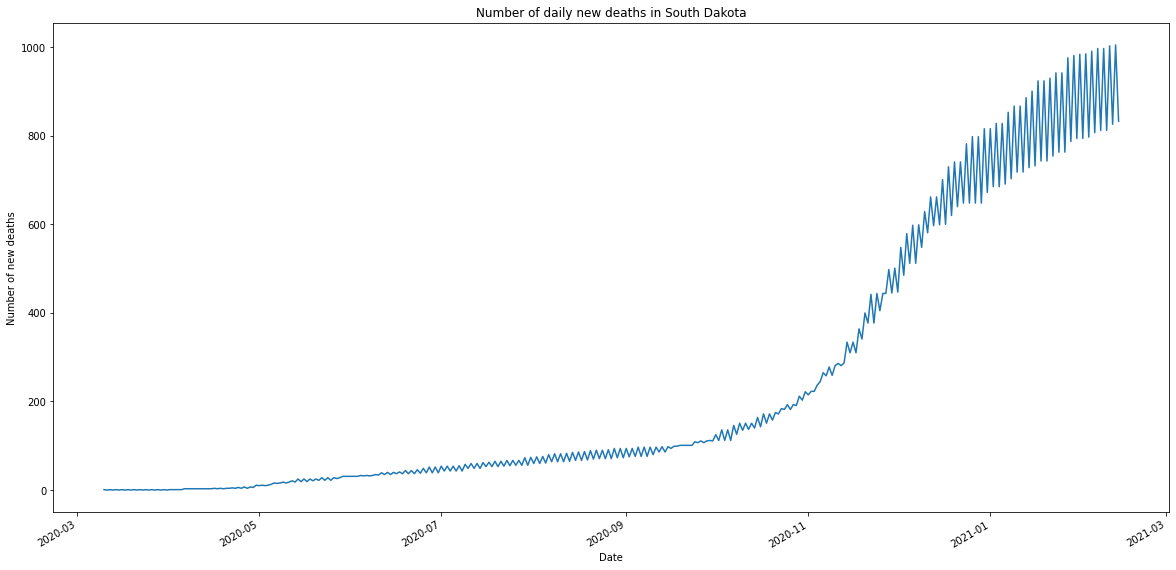

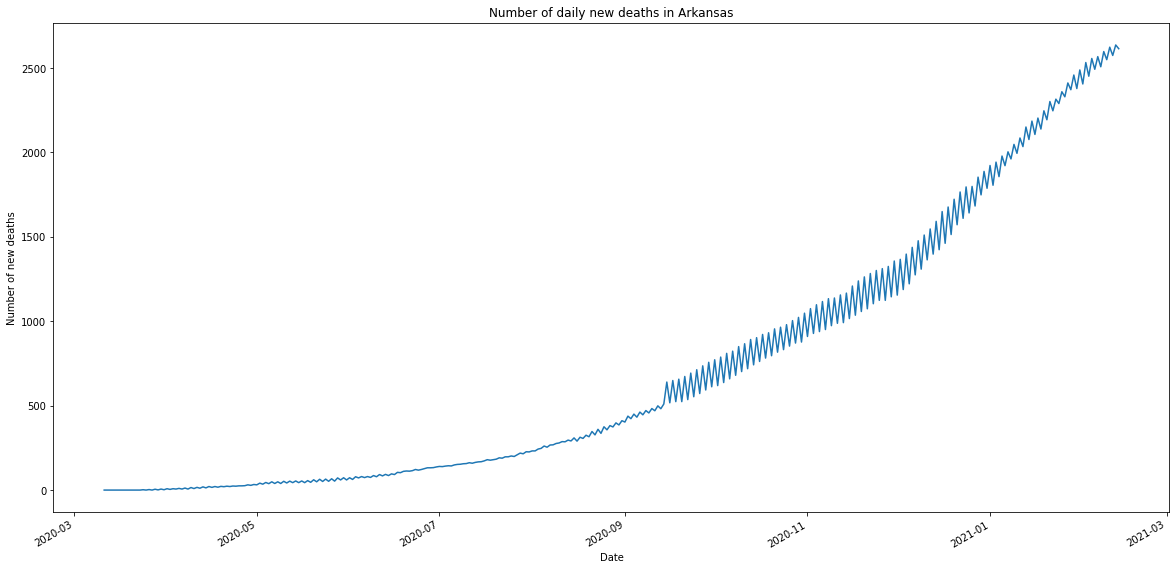

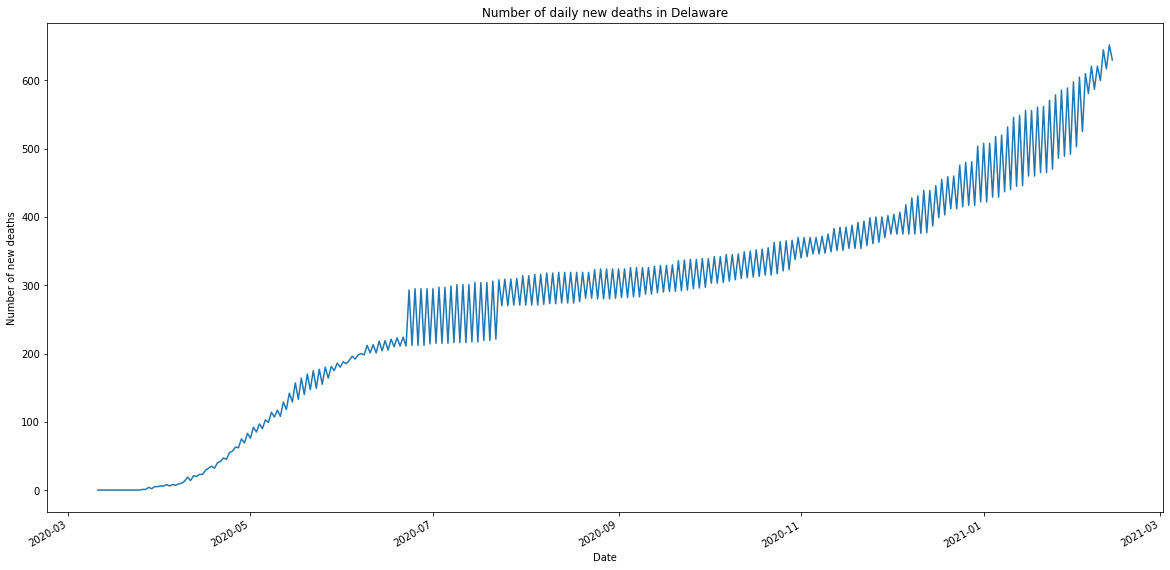

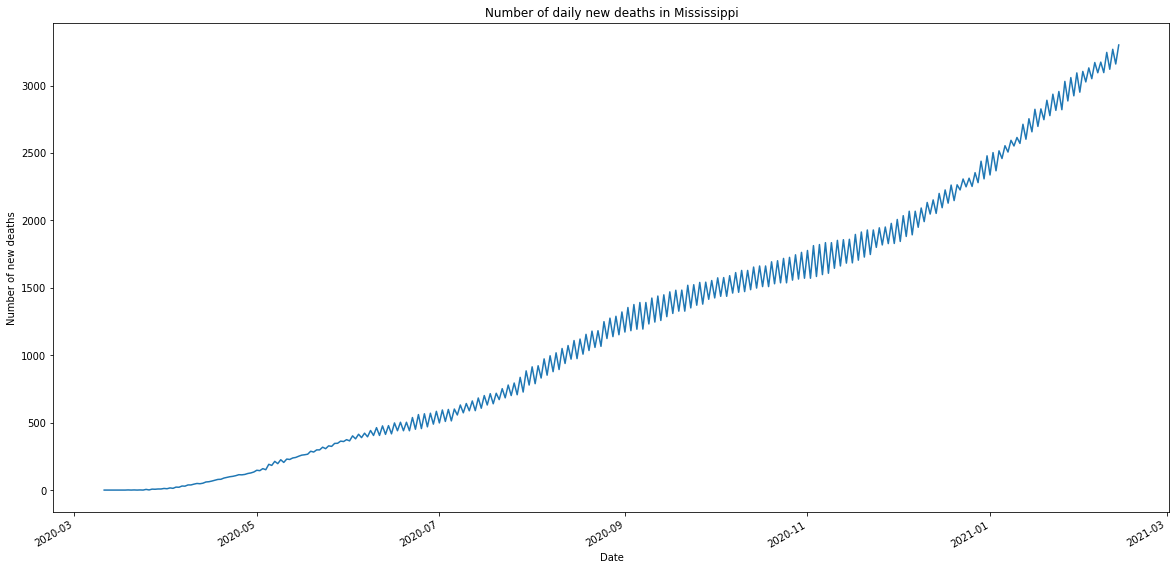

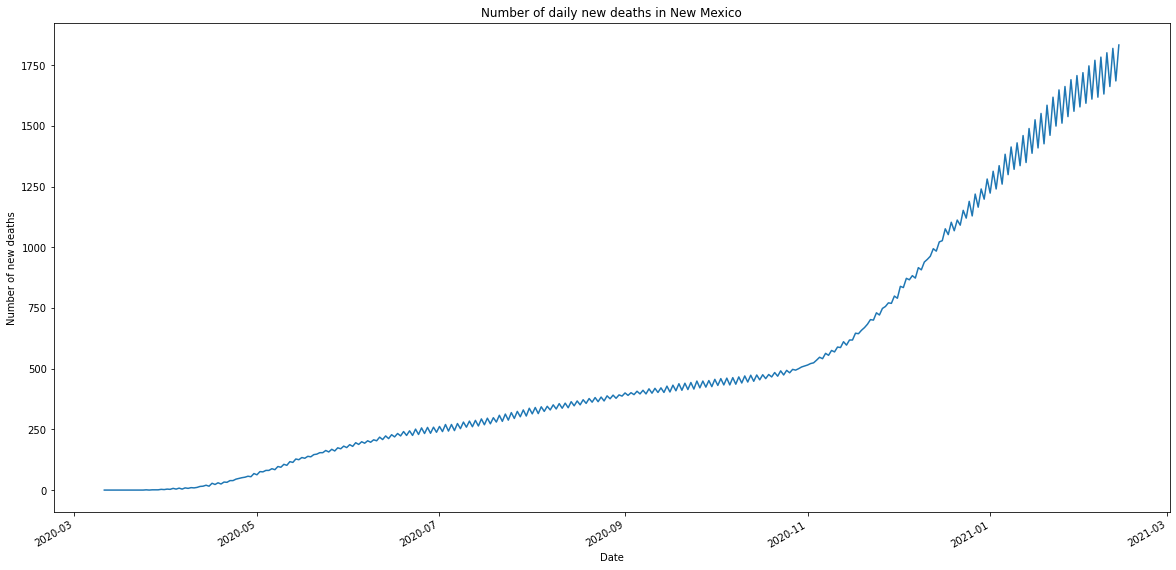

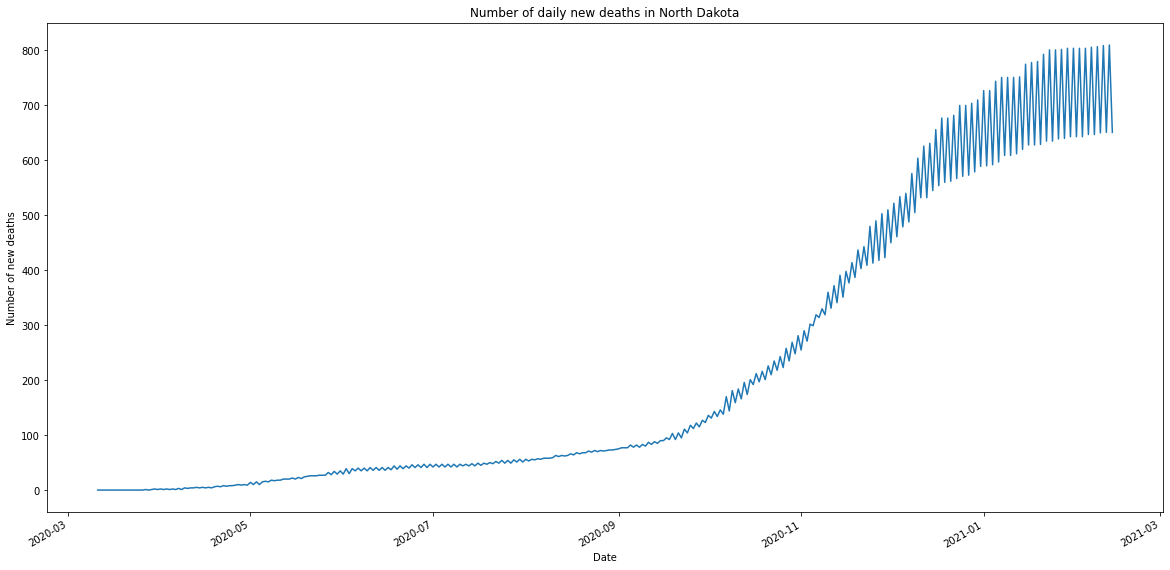

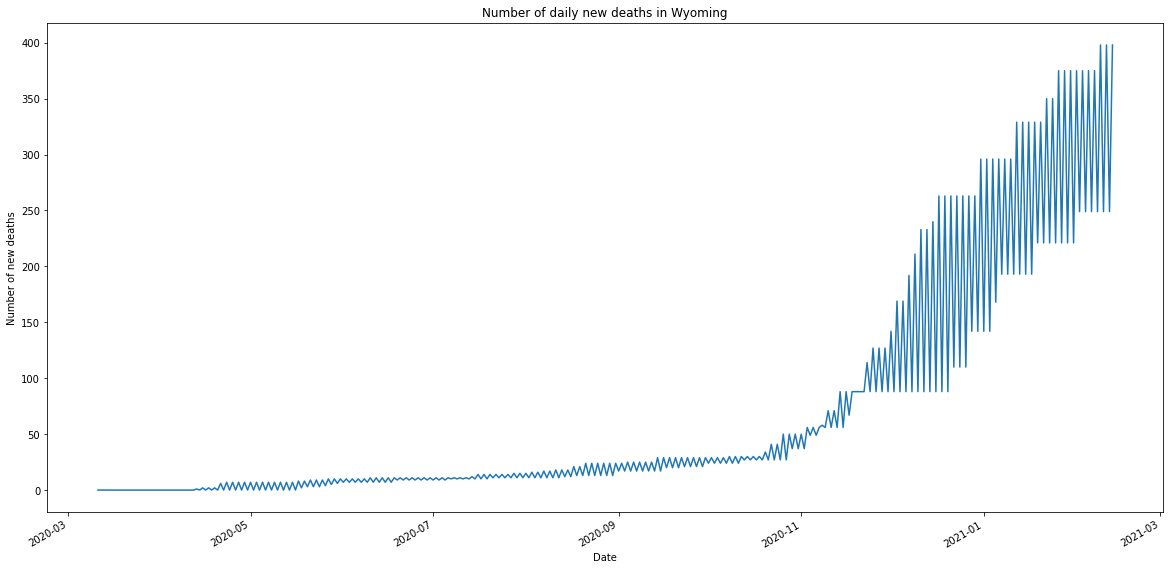

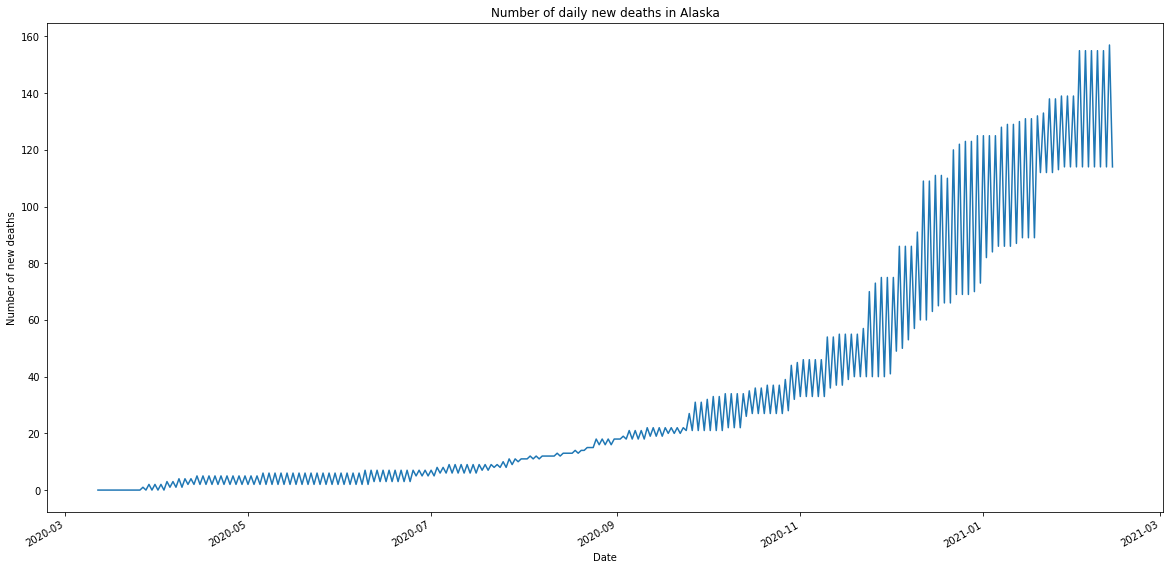

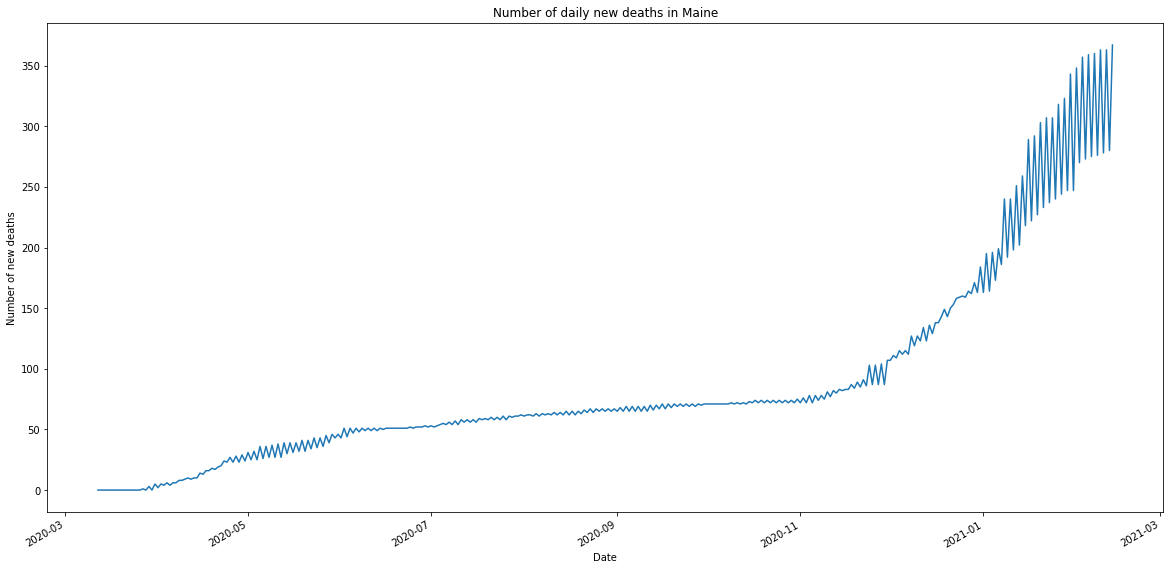

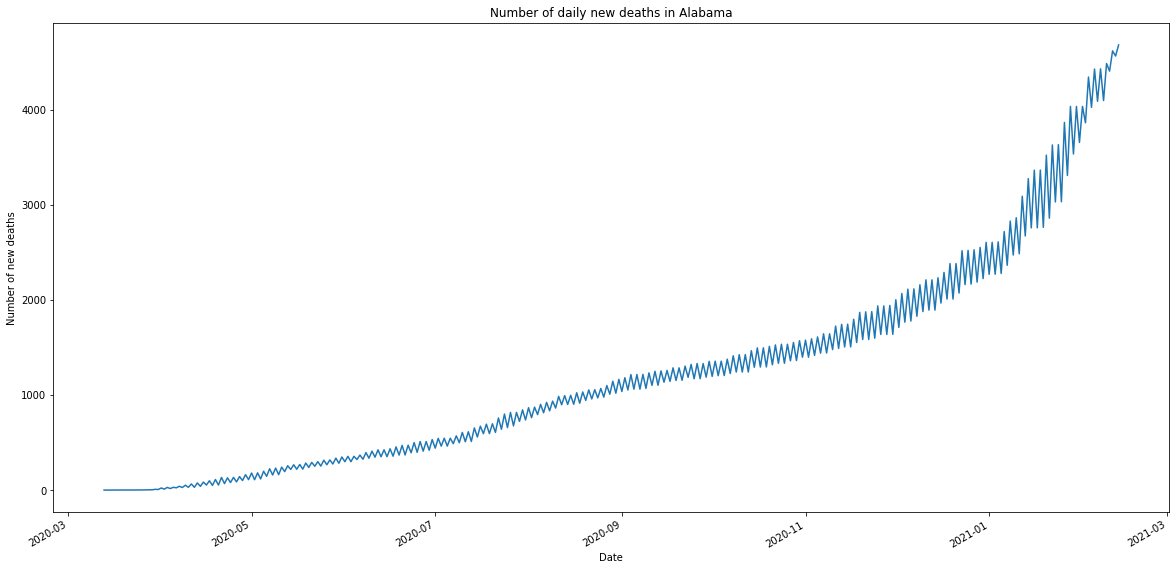

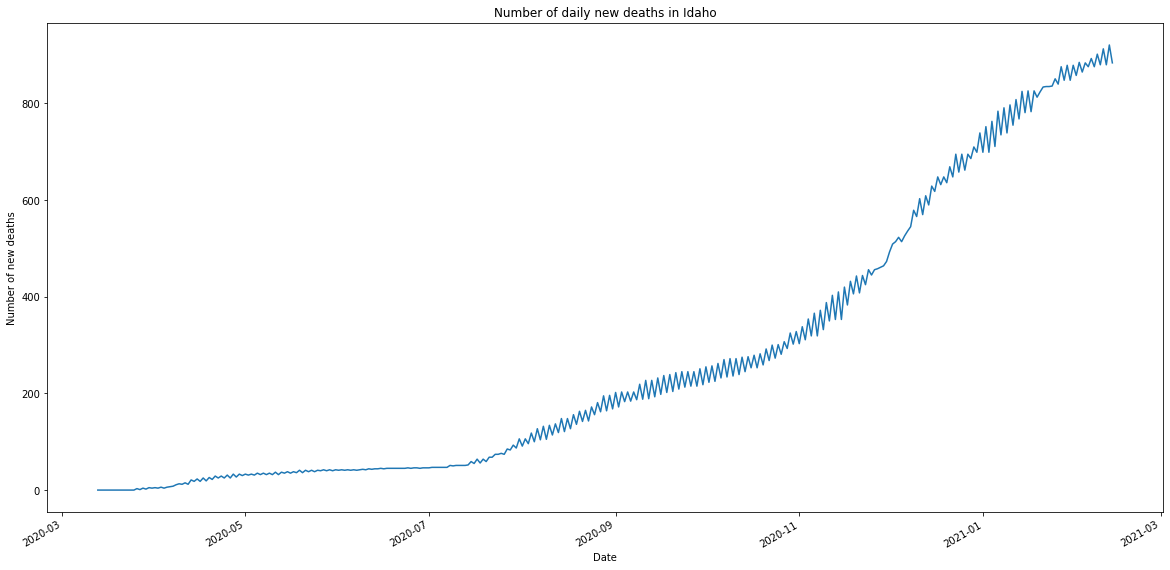

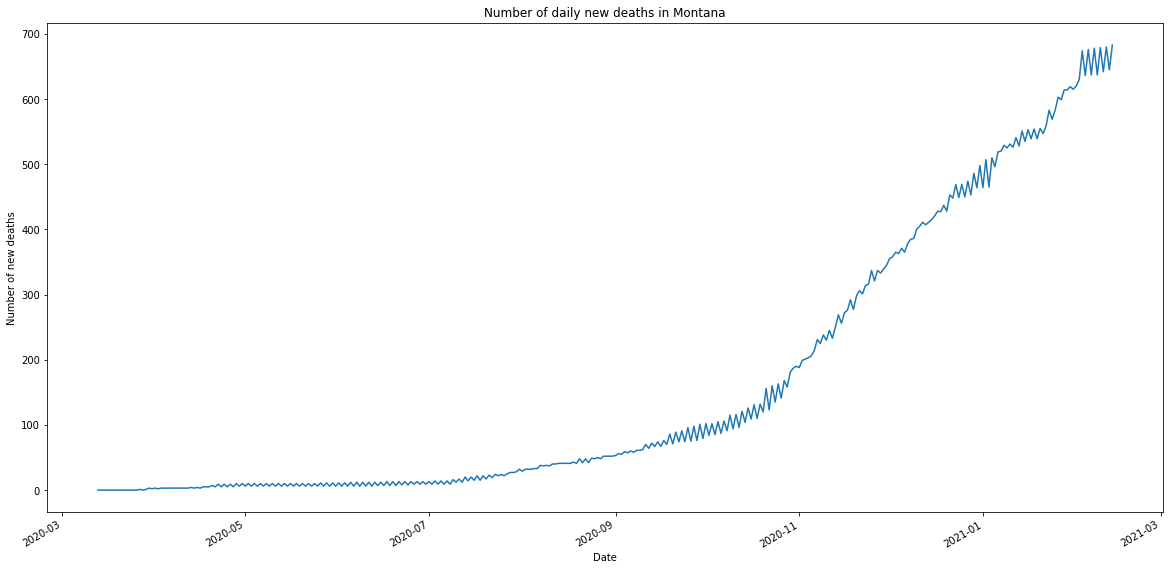

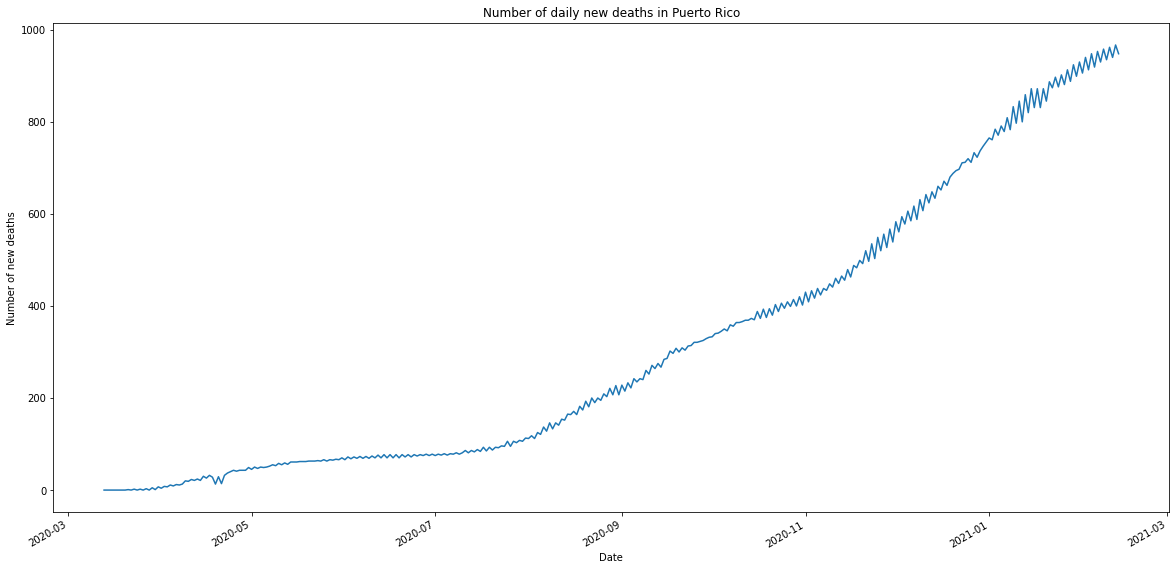

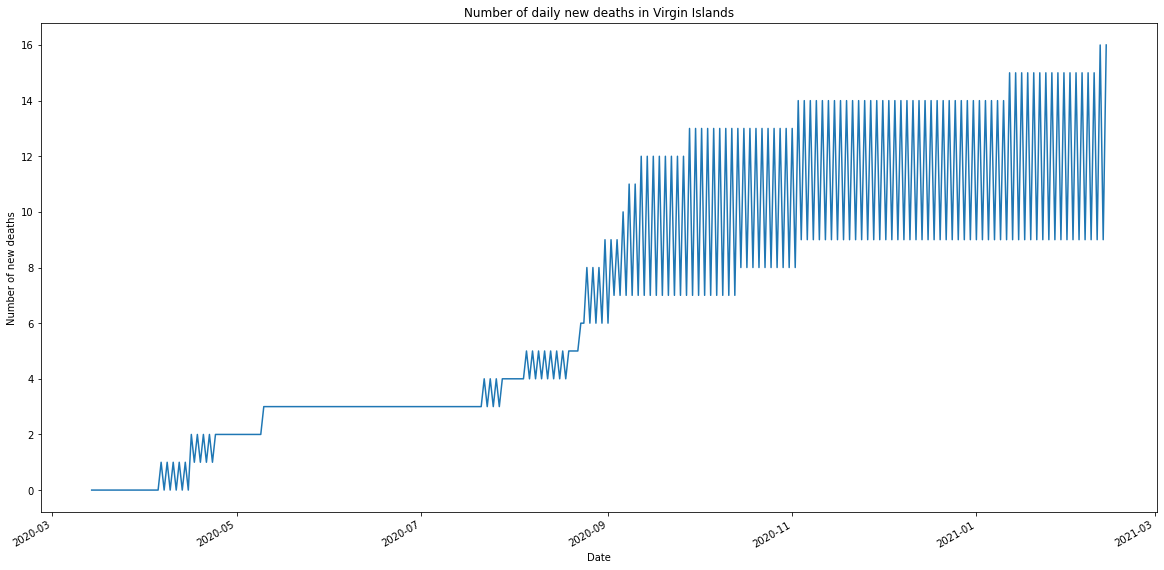

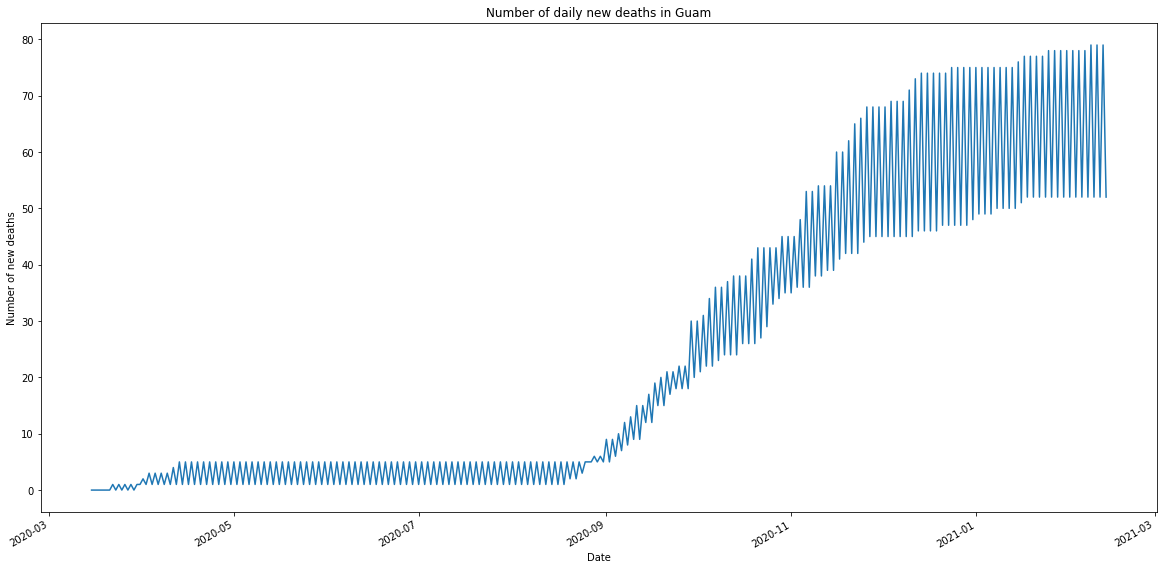

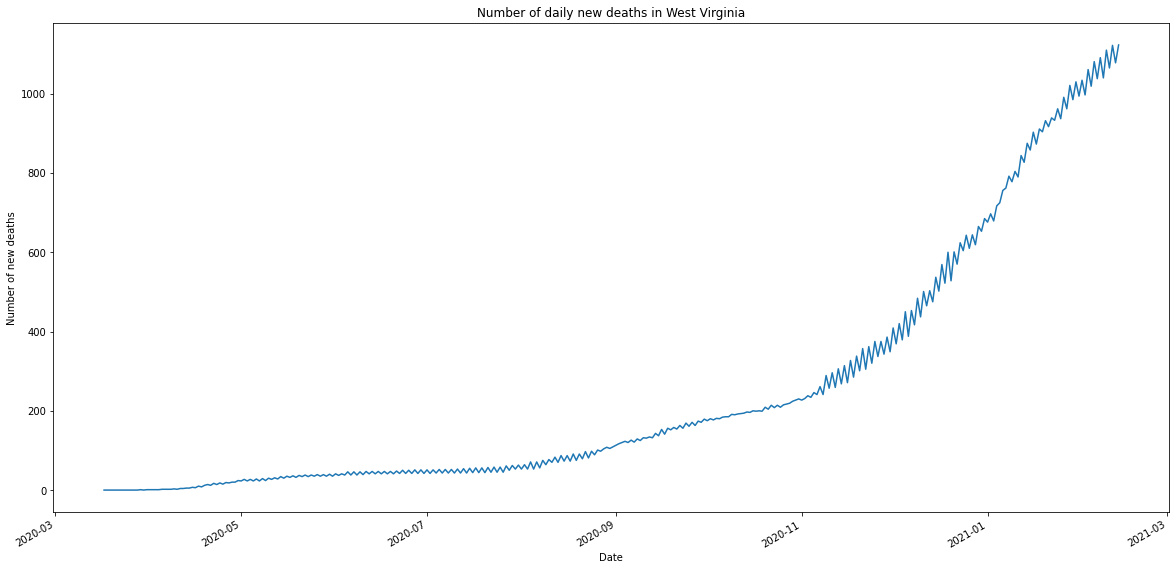

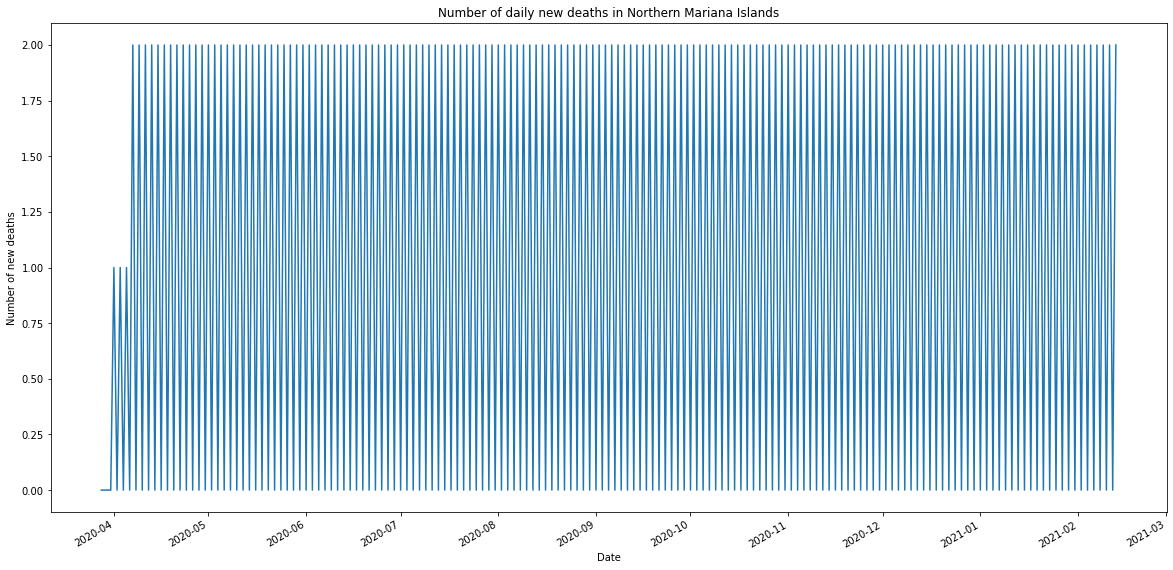

In [5]:
for key in statesData:
    stateDeathT = np.array(statesData[key]).transpose()
    numDeath = stateDeathT[1].astype(np.int)
    #print(usDeathT[1])
    fig, ax = plt.subplots(figsize=(20, 10))
    converted_dates = dates.datestr2num(stateDeathT[0])
    ax.plot(converted_dates, numDeath)
    ax.xaxis_date()
    fig.autofmt_xdate()
    plt.xlabel("Date")
    plt.ylabel("Number of new deaths")
    plt.title("Number of daily new deaths in " + key)
    plt.show()